<a href="https://colab.research.google.com/github/sajad95/Heat/blob/main/PostProcessing_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from numpy import hstack
from google.colab import drive
# mounting google drive and uploading the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import DataFrame
from pandas import concat
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv2D, MaxPooling2D, Flatten,Conv1D,Dropout
# saving and loading the .h5 model
from keras.models import Model
# define the model architecture
from keras.callbacks import Callback
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.layers import LSTM, Dropout, Dense, Input, Dot, Activation
from keras.layers import SimpleRNN
#####
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# make the model reproducible Ask Luc
import time
import os
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input
from keras.optimizers import Adam
from keras.losses import Huber
from keras import backend as K


In [3]:
# mounting google drive and uploading the data
drive.mount('/content/saj')

Mounted at /content/saj


In [4]:
class Metric:
    def __init__(self):
        self.metrics = pd.DataFrame(columns=['R-squared', 'MAE', 'MSE',  'CVRMSE'])

    def add(self, y_true, y_pred):
        residuals = y_true - y_pred
        ss_res = np.sum(residuals ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        mae = np.mean(np.abs(residuals))
        mse = np.mean(residuals ** 2)
        #mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        rmse = np.sqrt(mse)
        cvrmse = (rmse / np.mean(y_true)) * 100
        self.metrics.loc[len(self.metrics)] = [r_squared, mae, mse,  cvrmse]

    def get(self):
        return self.metrics

# make the results reproducible
def split_data2(data, first_fraction, second_fraction=None):
    n_total = len(data)
    n_first_split = round(n_total * first_fraction)

    first_split = data[:n_first_split]

    if second_fraction is None:
        second_split = data[n_first_split:]
    else:
        n_second_split = round(n_total * second_fraction)
        second_split = data[n_first_split:n_first_split+n_second_split]

    return first_split, second_split

def split_data(series):
    """Splits input series into train, val and test.
    """
    train_data = series[0:35040]
    test_data = series[35040:]
    return train_data, test_data
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

def R_squared(y_true, y_pred):
    residuals = y_true - y_pred
    ss_res = np.sum(residuals ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

# Data is splitted with thime (Miroslava)
def load_data(col=None, path="", verbose=False):
    df = pd.read_csv(path)
    if col is not None:
        df = df[col]
    if verbose:
        print(df.head())
    return df

from sklearn.preprocessing import MinMaxScaler

def normalize_data(dataframe):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(dataframe)
    normalized_dataframe = pd.DataFrame(normalized_data, columns=dataframe.columns)
    return normalized_dataframe

def R_squared(y, y_pred):
  residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  r2 = tf.subtract(1.0, tf.divide(residual, total))
  return r2

# data with time as feature
imput_col_time = ['DryBulbTemperature','DirectNormalRadiation','OccupancySchedule','dayofw','hours','months','datee','Heating','holiday_name','holiday_bool','SnowDepth']

#imput_col_time = ['Dry Bulb Temperature','Direct Normal Radiation','Occupancy Schedule','dayofw','Heating']
multivar_df_time =load_data(imput_col_time, path = '/content/saj/MyDrive/ . h5 formta, data/k2015-2019.csv',verbose = True )

# data with no time as feature
#multivar_df_time = normalize_data(multivar_df_time)

   DryBulbTemperature  DirectNormalRadiation  OccupancySchedule  dayofw  \
0                -4.5                      0                0.0       3   
1                -4.4                      0                0.0       3   
2                -8.8                      0                0.0       3   
3               -10.1                      0                0.0       3   
4               -10.8                      0                0.0       3   

   hours  months       datee    Heating    holiday_name  holiday_bool  \
0      0       1  2015-01-01  31.169920  New Year's Day          True   
1      1       1  2015-01-01  22.224366  New Year's Day          True   
2      2       1  2015-01-01  29.008912  New Year's Day          True   
3      3       1  2015-01-01  23.141465  New Year's Day          True   
4      4       1  2015-01-01  29.677110  New Year's Day          True   

   SnowDepth  
0          0  
1          0  
2          0  
3          0  
4          0  


In [5]:
multivar_df_time['dayofw'] = multivar_df_time['dayofw'].astype(float)

In [6]:
train_multi, test_multi = split_data(multivar_df_time)

In [7]:
## For Training
# define input sequence
in_seq1 = train_multi['DirectNormalRadiation'].values
in_seq6 = train_multi['DryBulbTemperature'].values
in_seq5 = train_multi['OccupancySchedule'].values
in_seq7 = train_multi['dayofw'].values
in_seq2 = train_multi['Heating'].values
out_seq = train_multi['Heating'].values

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
# in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1,in_seq6 ,in_seq5,in_seq7, in_seq2, out_seq))

# For testing
in_seq1_test = test_multi['DirectNormalRadiation'].values
in_seq6_test = test_multi['DryBulbTemperature'].values
in_seq5_test = test_multi['OccupancySchedule'].values
in_seq7_test = test_multi['dayofw'].values
in_seq2_test = test_multi['Heating'].values
out_seq_test = test_multi['Heating'].values

# convert to [rows, columns] structure
in_seq1_test = in_seq1_test.reshape((len(in_seq1_test), 1))
in_seq2_test = in_seq2_test.reshape((len(in_seq2_test), 1))
in_seq5_test = in_seq5_test.reshape((len(in_seq5_test), 1))
in_seq6_test = in_seq6_test.reshape((len(in_seq6_test), 1))
in_seq7_test = in_seq7_test.reshape((len(in_seq7_test), 1))
out_seq_test = out_seq_test.reshape((len(out_seq_test), 1))
# horizontally stack columns
in_seq1 = train_multi['DirectNormalRadiation'].values
in_seq6 = train_multi['DryBulbTemperature'].values
in_seq5 = train_multi['OccupancySchedule'].values
in_seq7 = train_multi['dayofw'].values
in_seq2 = train_multi['Heating'].values
out_seq = train_multi['Heating'].values

dataset_test = hstack((in_seq1_test,in_seq6_test ,in_seq5_test ,in_seq7_test , in_seq2_test,  out_seq_test))

# choose a number of time steps
n_steps_in, n_steps_out = 16, 24
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
print(X.shape, y.shape)
# summarize the data
X1, y1 = split_sequences(dataset_test, n_steps_in, n_steps_out)
print(X1.shape, y1.shape)
# Looking to first ten samples

n_features = X.shape[2]

(35001, 16, 5) (35001, 24)
(8720, 16, 5) (8720, 24)


In [8]:
from keras.models import Model
from keras.models import load_model

In [89]:
#CNN = load_model('/content/saj/MyDrive/ . h5 formta, data/CNN3.h5')
#CNNLSTM= load_model('/content/saj/MyDrive/ . h5 formta, data/CNNLSTM3.h5')
#CNNRNN = load_model('/content/saj/MyDrive/ . h5 formta, data/CNNRNN3.h5')
#LSTM = load_model('/content/saj/MyDrive/ . h5 formta, data/LSTM3.h5')
#RNN = load_model('/content/saj/MyDrive/ . h5 formta, data/RNN3.h5')
#RNNLSTM = load_model('/content/saj/MyDrive/ . h5 formta, data/RNNLSTM3.h5')
#####
all_metrics = pd.read_csv('/content/saj/MyDrive/ . h5 formta, data/Times5.csv')
CNN_RNN = load_model('/content/CNNRNN3.h5')
CNN = load_model('/content/CNN3.h5')
RNN = load_model('/content/RNN3.h5')
RNNLSTM = load_model('/content/RNNLSTM3.h5')
Lstm = load_model('/content/LSTM3.h5')
CNN_lstm = load_model('/content/CNNLSTM3.h5')
CNN_RNNuni = load_model('/content/UNICNNRNN3.h5')

# comparing metrics

In [90]:
all_metrics

,Models,Time,Length of included years,R-squared,Average of R2,MAE,MSE,CVRMSE
0,LSTM,922.428065,2010-2019,0.675441,0.808493,10.300031,438.962461,101.593716
1,CNNLSTM,305.076802,2010-2019,0.834865,NaN,6.381874,223.343940,72.466993
2,RNNLSTM,329.284054,2010-2019,0.799283,NaN,7.300006,271.468370,79.893743
3,CNNRNN,97.525624,2010-2019,0.834483,NaN,6.612287,223.859535,72.550591
4,CNN,85.118663,2010-2019,0.870608,NaN,5.806738,175.001913,64.146734
5,RNN,82.101097,2010-2019,0.836281,NaN,6.204596,221.428853,72.155636
6,LSTM,4232.562217,2012-2019,0.756613,0.840560,7.417515,283.742900,95.662209
7,CNNLSTM,574.272598,2012-2019,0.853998,NaN,5.608118,170.210032,74.091857
8,RNNLSTM,756.378271,2012-2019,0.819007,NaN,6.377730,211.003170,82.494006
9,CNNRNN,410.534728,2012-2019,0.861187,NaN,5.455258,161.829785,72.244890


In [91]:
num_cols = n_steps_out
pred_cols = ['pt' + str(i + 1) for i in range(num_cols)]
real_cols = ['t' + str(i + 1) for i in range(num_cols)]

In [93]:
yhat1 = CNN_RNN.predict(X1, verbose=0)  # Replace X with your input data


In [14]:
metric = Metric()
R2 = []
df_prediction = pd.DataFrame(yhat1, columns=pred_cols)
df_realvalues = pd.DataFrame(y1, columns=real_cols)
pred_1 = df_prediction['pt1']
Real_1 = df_realvalues['t1']
R2.append(R_squared(Real_1, pred_1))
metric.add(y1, yhat1)
metrics_df = metric.get()

In [15]:
metrics_df

,R-squared,MAE,MSE,CVRMSE
0,0.87858,5.536844,164.219417,62.139164


In [16]:
predictions = []
predictions.append(yhat1)
df_prediction1 = pd.DataFrame(np.concatenate(predictions), columns=pred_cols)

In [17]:
def shift_columns(df, shift_ranges):
    shifted_columns = []
    for i, shift_value in enumerate(shift_ranges, start=1):
        column_name = f'pt{i}'
        shifted_column_name = f'shifted_{column_name}'
        df[shifted_column_name] = df[column_name].shift(shift_value)
        shifted_columns.append(shifted_column_name)
    df = df[shifted_columns]  # Keep only the shifted columns
    return df

In [18]:
shift_ranges = range(16, 40)
df_prediction1 = shift_columns(df_prediction1, shift_ranges)

In [19]:
df_prediction1

,shifted_pt1,shifted_pt2,shifted_pt3,shifted_pt4,shifted_pt5,shifted_pt6,shifted_pt7,shifted_pt8,shifted_pt9,shifted_pt10,...,shifted_pt15,shifted_pt16,shifted_pt17,shifted_pt18,shifted_pt19,shifted_pt20,shifted_pt21,shifted_pt22,shifted_pt23,shifted_pt24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,15.147017,12.949194,9.512996,10.503371,8.464438,8.853658,7.246022,8.500329,4.012806,4.378468,...,1.644012,0.325491,0.000000,1.240293,0.000000,4.533409,4.351344,4.009076,2.390298,1.985722
8716,18.021114,13.335520,16.350346,10.533544,13.056657,8.990285,8.787034,7.017127,8.817169,7.316886,...,8.009169,1.253891,1.863622,1.197374,2.882522,3.294642,4.918096,6.776622,3.716430,3.038531
8717,28.060781,26.747944,27.438162,27.525497,24.266163,24.397150,21.734163,20.997480,20.101311,25.228786,...,20.272188,21.315189,17.162088,17.771816,16.768681,18.398621,16.187702,16.668276,20.087982,14.030169
8718,49.871925,49.426769,49.074059,49.695702,51.067673,47.635723,52.934227,48.034733,49.237637,43.657471,...,46.981934,44.669792,46.152542,40.070698,42.257545,43.675652,40.688686,40.417751,38.538445,37.511497


In [20]:
df_realvalues = pd.DataFrame(y1, columns=real_cols)

In [21]:
def shift_columns2(df, shift_ranges):
    shifted_columns = []
    for i, shift_value in enumerate(shift_ranges, start=1):
        column_name = f't{i}'
        shifted_column_name = f'shifted_{column_name}'
        df[shifted_column_name] = df[column_name].shift(shift_value)
        shifted_columns.append(shifted_column_name)

    df = df[shifted_columns]  # Keep only the shifted columns
    return df
# Assuming you have a DataFrame called 'df_realvalues'
shift_ranges = range(16, 40)
shifted_df_real = shift_columns2(df_realvalues, shift_ranges)

In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [23]:
import pandas as pd
# Check for NaN values in each row of the DataFrame
nan_indices = shifted_df_real.isna().any(axis=1).tolist()
# Get the indices with NaN values
indices_with_nan = [i for i, nan_value in enumerate(nan_indices) if nan_value]
print(indices_with_nan)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


In [24]:
# Check for NaN values in each row of the DataFrame
nan_indices2 = df_prediction1.isna().any(axis=1).tolist()
# Get the indices with NaN values
indices_with_nan2 = [i for i, nan_value in enumerate(nan_indices2) if nan_value]
print(indices_with_nan2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


In [25]:
shifted_df_real = shifted_df_real.dropna()
df_prediction1 = df_prediction1.dropna()

In [26]:
nan_indices2 = df_prediction1.isna().any(axis=1).tolist()
# Get the indices with NaN values
indices_with_nan2 = [i for i, nan_value in enumerate(nan_indices2) if nan_value]
print(indices_with_nan2)

[]


In [27]:
# Check for NaN values in each row of the DataFrame
nan_indices = shifted_df_real.isna().any(axis=1).tolist()
# Get the indices with NaN values
indices_with_nan = [i for i, nan_value in enumerate(nan_indices) if nan_value]
print(indices_with_nan)

[]


In [28]:
shifted_df_real

,shifted_t1,shifted_t2,shifted_t3,shifted_t4,shifted_t5,shifted_t6,shifted_t7,shifted_t8,shifted_t9,shifted_t10,...,shifted_t15,shifted_t16,shifted_t17,shifted_t18,shifted_t19,shifted_t20,shifted_t21,shifted_t22,shifted_t23,shifted_t24
39,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,...,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676
40,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,...,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451
41,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,...,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576
42,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,...,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033
43,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,...,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,10.405956,10.405956,10.405956,10.405956,10.405956,10.405956,10.405956,10.405956,10.405956,10.405956,...,10.405956,10.405956,10.405956,10.405956,10.405956,10.405956,10.405956,10.405956,10.405956,10.405956
8716,12.639644,12.639644,12.639644,12.639644,12.639644,12.639644,12.639644,12.639644,12.639644,12.639644,...,12.639644,12.639644,12.639644,12.639644,12.639644,12.639644,12.639644,12.639644,12.639644,12.639644
8717,32.741763,32.741763,32.741763,32.741763,32.741763,32.741763,32.741763,32.741763,32.741763,32.741763,...,32.741763,32.741763,32.741763,32.741763,32.741763,32.741763,32.741763,32.741763,32.741763,32.741763
8718,54.440741,54.440741,54.440741,54.440741,54.440741,54.440741,54.440741,54.440741,54.440741,54.440741,...,54.440741,54.440741,54.440741,54.440741,54.440741,54.440741,54.440741,54.440741,54.440741,54.440741


In [29]:
df_prediction1

,shifted_pt1,shifted_pt2,shifted_pt3,shifted_pt4,shifted_pt5,shifted_pt6,shifted_pt7,shifted_pt8,shifted_pt9,shifted_pt10,...,shifted_pt15,shifted_pt16,shifted_pt17,shifted_pt18,shifted_pt19,shifted_pt20,shifted_pt21,shifted_pt22,shifted_pt23,shifted_pt24
39,107.567291,113.148598,119.595154,124.030724,131.867828,128.638351,130.079773,128.599686,134.613617,133.399155,...,139.808777,127.942619,137.065750,131.362579,134.820816,132.940552,110.966682,111.310730,101.273323,97.723549
40,104.991341,107.710869,115.298096,118.754036,125.974625,125.737556,131.834351,130.538315,138.365524,135.897736,...,142.756241,132.384003,129.830383,136.200333,136.255768,126.773132,141.520767,109.272072,110.615524,96.937042
41,109.066895,113.655930,119.493111,123.094376,128.936035,129.148712,134.096680,132.740204,142.558884,144.530121,...,139.227814,141.588013,140.230453,141.405106,143.040649,154.972000,135.796906,145.691208,109.256485,114.817917
42,102.218521,116.786285,116.291496,123.503906,130.651428,125.459007,132.538559,141.105194,142.027451,146.313522,...,141.800934,134.397980,147.075470,146.251129,149.756546,160.894958,148.754807,140.064224,149.188217,113.917389
43,106.000595,103.724937,112.598152,118.517311,125.538490,123.927063,131.037613,131.440720,144.315002,142.311691,...,143.191452,146.167465,138.567596,147.472214,149.880798,172.913361,154.791473,155.988144,142.878510,153.819244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,15.147017,12.949194,9.512996,10.503371,8.464438,8.853658,7.246022,8.500329,4.012806,4.378468,...,1.644012,0.325491,0.000000,1.240293,0.000000,4.533409,4.351344,4.009076,2.390298,1.985722
8716,18.021114,13.335520,16.350346,10.533544,13.056657,8.990285,8.787034,7.017127,8.817169,7.316886,...,8.009169,1.253891,1.863622,1.197374,2.882522,3.294642,4.918096,6.776622,3.716430,3.038531
8717,28.060781,26.747944,27.438162,27.525497,24.266163,24.397150,21.734163,20.997480,20.101311,25.228786,...,20.272188,21.315189,17.162088,17.771816,16.768681,18.398621,16.187702,16.668276,20.087982,14.030169
8718,49.871925,49.426769,49.074059,49.695702,51.067673,47.635723,52.934227,48.034733,49.237637,43.657471,...,46.981934,44.669792,46.152542,40.070698,42.257545,43.675652,40.688686,40.417751,38.538445,37.511497


In [30]:
# Assuming df1 and df2 have the same number of columns
metrics = []
# Iterate over each column in df1 and df2
for col1, col2 in zip(shifted_df_real.columns, df_prediction1.columns):
    # Get the column values as arrays
    y_true = shifted_df_real[col1].values
    y_pred = df_prediction1[col2].values
    # Handle missing values
    valid_indices = np.logical_and(~np.isnan(y_true), ~np.isnan(y_pred))
    y_true = y_true[valid_indices]
    y_pred = y_pred[valid_indices]
    r2 = r2_score(y_true, y_pred)
    cvrmse = (mean_squared_error(y_true, y_pred) ** 0.5) / y_true.mean()
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    # Append the metrics to the list
    metrics.append({
        'Column1': col1,
        'Column2': col2,
        'R2': r2,
        'CVRMSE': cvrmse,
        'MAE': mae,
        'RMSE': rmse
    })
# Create a dataframe from the metrics list
metrics_df = pd.DataFrame(metrics)


In [31]:
metrics_df

,Column1,Column2,R2,CVRMSE,MAE,RMSE
0,shifted_t1,shifted_pt1,0.963070,0.344002,3.079225,7.038503
1,shifted_t2,shifted_pt2,0.949356,0.402842,3.437939,8.242392
2,shifted_t3,shifted_pt3,0.940912,0.435132,3.735445,8.903076
3,shifted_t4,shifted_pt4,0.936144,0.452346,3.875233,9.255282
4,shifted_t5,shifted_pt5,0.929420,0.475568,4.195096,9.730422
5,shifted_t6,shifted_pt6,0.921722,0.500830,4.459800,10.247289
6,shifted_t7,shifted_pt7,0.918076,0.512362,4.600550,10.483255
7,shifted_t8,shifted_pt8,0.915541,0.520229,4.636926,10.644213
8,shifted_t9,shifted_pt9,0.908044,0.542828,4.790629,11.106596
9,shifted_t10,shifted_pt10,0.901113,0.562912,5.015349,11.517523


In [32]:
test_multi = test_multi.reset_index(drop=True)

In [33]:
Analyze_df = pd.concat([test_multi,df_prediction1], axis=1)

In [34]:
# getting the index of any column with its name
index = Analyze_df.columns.get_loc('shifted_pt1')
print(index)

11


In [35]:
# Remove rows which has a nan values in predicted column
Analyze_df = Analyze_df.drop(Analyze_df.index[:39]).drop(Analyze_df.index[-39:])

In [36]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

def calculate_metrics(Analyze_df):
    # Create a dictionary to store the metrics
    metrics_dict = {'Index': []}

    # Iterate over each index
    for index in Analyze_df.index:
        # Get the value of column 'Heating' for the current index
        y_true = Analyze_df.loc[index, 'Heating']
        metrics_dict['Index'].append(index)

        # Calculate MAE for each shifted_pt value and store in the metrics dictionary
        for i in range(1, 25):
            y_pred = Analyze_df.loc[index, f'shifted_pt{i}']
            mae = mean_absolute_error([y_true], [y_pred])
            column_name = f'{i} step ahead prediction'
            metrics_dict[column_name] = metrics_dict.get(column_name, []) + [mae]

    # Create a DataFrame from the metrics dictionary
    metrics_df = pd.DataFrame(metrics_dict)
    return metrics_df

In [37]:
calculate_metrics(Analyze_df)

,Index,1 step ahead prediction,2 step ahead prediction,3 step ahead prediction,4 step ahead prediction,5 step ahead prediction,6 step ahead prediction,7 step ahead prediction,8 step ahead prediction,9 step ahead prediction,...,15 step ahead prediction,16 step ahead prediction,17 step ahead prediction,18 step ahead prediction,19 step ahead prediction,20 step ahead prediction,21 step ahead prediction,22 step ahead prediction,23 step ahead prediction,24 step ahead prediction
0,39,2.677385,2.903921,9.350477,13.786047,21.623152,18.393675,19.835097,18.355009,24.368941,...,29.564100,17.697943,26.821074,21.117903,24.576140,22.695875,0.722006,1.066054,8.971353,12.521128
1,40,1.468890,4.188418,11.775645,15.231585,22.452174,22.215106,28.311900,27.015864,34.843073,...,39.233790,28.861552,26.307933,32.677882,32.733317,23.250682,37.998316,5.749621,7.093073,6.585409
2,41,2.661682,1.927353,7.764534,11.365799,17.207459,17.420136,22.368103,21.011628,30.830307,...,27.499237,29.859436,28.501877,29.676529,31.312073,43.243424,24.068329,33.962632,2.472091,3.089341
3,42,18.722512,4.154747,4.649537,2.562873,9.710395,4.517974,11.597526,20.164161,21.086418,...,20.859901,13.456947,26.134437,25.310096,28.815513,39.953926,27.813774,19.123191,28.247184,7.023644
4,43,13.704841,15.980499,7.107284,1.188125,5.833054,4.221627,11.332177,11.735283,24.609566,...,23.486016,26.462029,18.862160,27.766777,30.175362,53.207924,35.086037,36.282708,23.173073,34.113808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676,8715,4.741061,2.543238,0.892960,0.097416,1.941517,1.552298,3.159933,1.905627,6.393150,...,8.761944,10.080464,10.405956,9.165662,10.405956,5.872547,6.054612,6.396880,8.015658,8.420234
8677,8716,5.381471,0.695876,3.710702,2.106100,0.417013,3.649359,3.852610,5.622517,3.822475,...,4.630475,11.385753,10.776021,11.442270,9.757122,9.345001,7.721548,5.863022,8.923214,9.601113
8678,8717,4.680982,5.993819,5.303601,5.216266,8.475600,8.344613,11.007600,11.744283,12.640452,...,12.469575,11.426574,15.579675,14.969947,15.973082,14.343142,16.554061,16.073487,12.653781,18.711595
8679,8718,4.568815,5.013971,5.366682,4.745039,3.373068,6.805017,1.506514,6.406008,5.203104,...,7.458807,9.770948,8.288198,14.370043,12.183195,10.765089,13.752054,14.022989,15.902296,16.929243


In [38]:
metrics_df

,Column1,Column2,R2,CVRMSE,MAE,RMSE
0,shifted_t1,shifted_pt1,0.963070,0.344002,3.079225,7.038503
1,shifted_t2,shifted_pt2,0.949356,0.402842,3.437939,8.242392
2,shifted_t3,shifted_pt3,0.940912,0.435132,3.735445,8.903076
3,shifted_t4,shifted_pt4,0.936144,0.452346,3.875233,9.255282
4,shifted_t5,shifted_pt5,0.929420,0.475568,4.195096,9.730422
5,shifted_t6,shifted_pt6,0.921722,0.500830,4.459800,10.247289
6,shifted_t7,shifted_pt7,0.918076,0.512362,4.600550,10.483255
7,shifted_t8,shifted_pt8,0.915541,0.520229,4.636926,10.644213
8,shifted_t9,shifted_pt9,0.908044,0.542828,4.790629,11.106596
9,shifted_t10,shifted_pt10,0.901113,0.562912,5.015349,11.517523


In [39]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
# Create a dictionary to store the metrics
metrics_dict = {'Index': []}
# Iterate over each index
for index in Analyze_df.index:
    # Get the value of column 'Heating' for the current index
    y_true = Analyze_df.loc[index, 'Heating']
    metrics_dict['Index'].append(index)

    # Calculate MAE for each shifted_pt value and store in the metrics dictionary
    for i in range(1, 25):
        y_pred = Analyze_df.loc[index, f'shifted_pt{i}']
        mae = mean_absolute_error([y_true], [y_pred])
        column_name = f'{i} step ahead'
        metrics_dict[column_name] = metrics_dict.get(column_name, []) + [mae]
# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics_dict)

In [40]:
metrics_df

,Index,1 step ahead,2 step ahead,3 step ahead,4 step ahead,5 step ahead,6 step ahead,7 step ahead,8 step ahead,9 step ahead,...,15 step ahead,16 step ahead,17 step ahead,18 step ahead,19 step ahead,20 step ahead,21 step ahead,22 step ahead,23 step ahead,24 step ahead
0,39,2.677385,2.903921,9.350477,13.786047,21.623152,18.393675,19.835097,18.355009,24.368941,...,29.564100,17.697943,26.821074,21.117903,24.576140,22.695875,0.722006,1.066054,8.971353,12.521128
1,40,1.468890,4.188418,11.775645,15.231585,22.452174,22.215106,28.311900,27.015864,34.843073,...,39.233790,28.861552,26.307933,32.677882,32.733317,23.250682,37.998316,5.749621,7.093073,6.585409
2,41,2.661682,1.927353,7.764534,11.365799,17.207459,17.420136,22.368103,21.011628,30.830307,...,27.499237,29.859436,28.501877,29.676529,31.312073,43.243424,24.068329,33.962632,2.472091,3.089341
3,42,18.722512,4.154747,4.649537,2.562873,9.710395,4.517974,11.597526,20.164161,21.086418,...,20.859901,13.456947,26.134437,25.310096,28.815513,39.953926,27.813774,19.123191,28.247184,7.023644
4,43,13.704841,15.980499,7.107284,1.188125,5.833054,4.221627,11.332177,11.735283,24.609566,...,23.486016,26.462029,18.862160,27.766777,30.175362,53.207924,35.086037,36.282708,23.173073,34.113808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676,8715,4.741061,2.543238,0.892960,0.097416,1.941517,1.552298,3.159933,1.905627,6.393150,...,8.761944,10.080464,10.405956,9.165662,10.405956,5.872547,6.054612,6.396880,8.015658,8.420234
8677,8716,5.381471,0.695876,3.710702,2.106100,0.417013,3.649359,3.852610,5.622517,3.822475,...,4.630475,11.385753,10.776021,11.442270,9.757122,9.345001,7.721548,5.863022,8.923214,9.601113
8678,8717,4.680982,5.993819,5.303601,5.216266,8.475600,8.344613,11.007600,11.744283,12.640452,...,12.469575,11.426574,15.579675,14.969947,15.973082,14.343142,16.554061,16.073487,12.653781,18.711595
8679,8718,4.568815,5.013971,5.366682,4.745039,3.373068,6.805017,1.506514,6.406008,5.203104,...,7.458807,9.770948,8.288198,14.370043,12.183195,10.765089,13.752054,14.022989,15.902296,16.929243


In [41]:
import seaborn as sns

In [42]:
metric_plot = metrics_df.iloc[:, 1:]

Text(0, 0.5, 'Horizon of predictions')

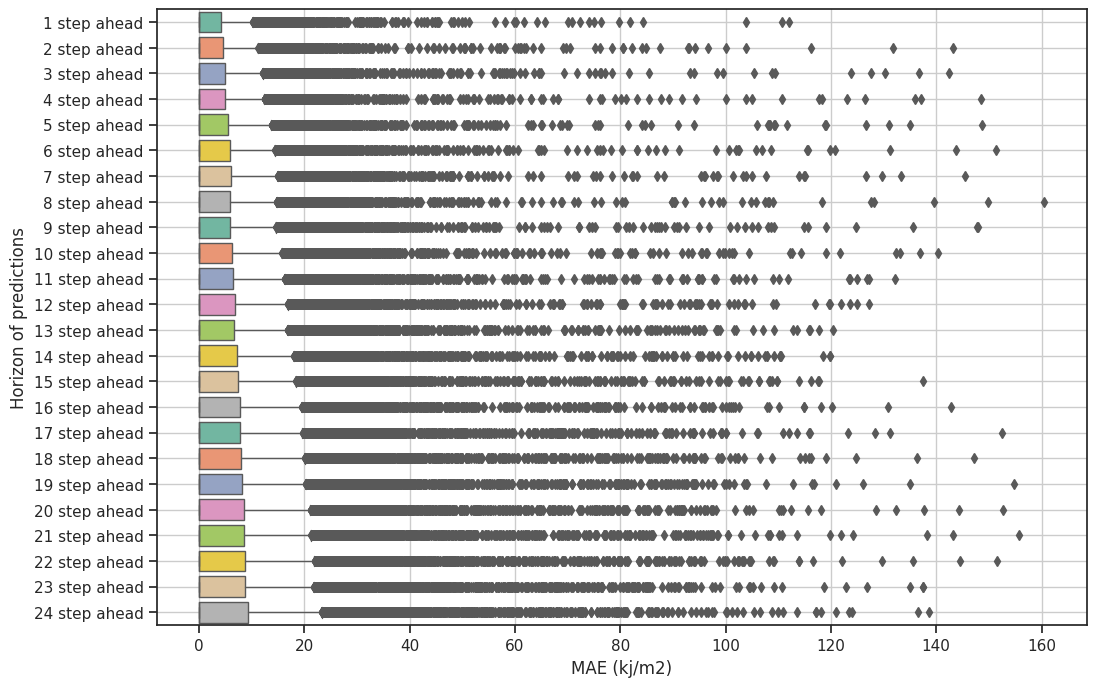

In [43]:
cmap = sns.color_palette("Blues", len(metric_plot))
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(12, 8))
#ax.set_xscale("log")
ax = sns.boxplot(data=metric_plot, orient="h", palette="Set2", linewidth=1)
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#plt.title('Example Plot')
# Set x-axis label
plt.xlabel('MAE (kj/m2)')
# Set y-axis label
plt.ylabel('Horizon of predictions')
#boxplot If you used it, you should remove scale = 'linear'
#boxenplot if you used it, you can use scale = 'linear'

In [44]:
# Make predictions on the test data
predictions1 = Analyze_df.loc[66:90, 'shifted_pt1']
Real = Analyze_df.loc[66:90, 'Heating']
# Calculate the standard error of the residuals
residuals1 = Real - predictions1
residual_std = np.std(residuals1)
# Set the desired confidence level (e.g., 95%)
confidence_level = 0.95
# Calculate the critical value based on the confidence level
critical_value = 1.96  # For a 95% confidence interval (assuming a normal distribution)
# Calculate the confidence interval for each predicted value
confidence_interval_lower = predictions1 - critical_value * residual_std
confidence_interval_upper = predictions1 + critical_value * residual_std

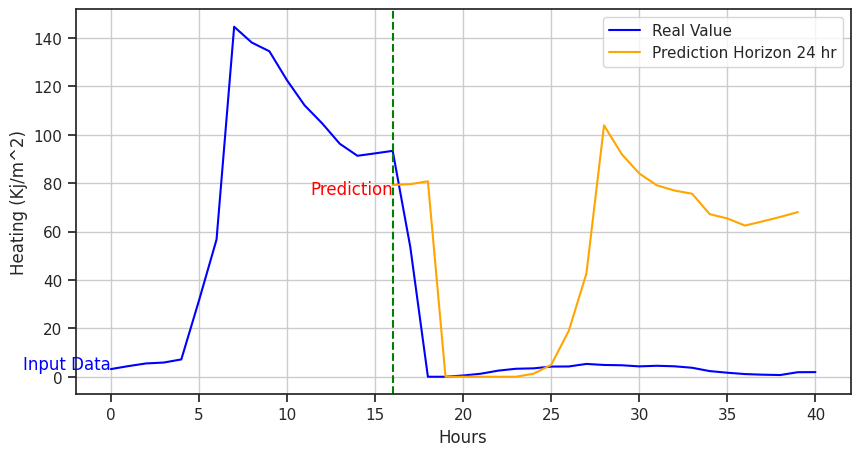

In [45]:
column_start_index = 11  # Starting column index for the variables
row_start_index = 100  # Starting row index for the variables

List_prediction = []
variable_names = []

# Generate the variables dynamically
for i in range(24):
    column_index = column_start_index + i
    row_index = row_start_index + i
    variable_name = f'H{i + 1}'  # Variable name based on the index
    globals()[variable_name] = Analyze_df.iloc[row_index, column_index]  # Create the variable
    List_prediction.append(globals()[variable_name])  # Add the variable to the list
    variable_names.append(variable_name)  # Keep track of the variable names

# Select the desired ranges of data
first_part = Analyze_df.loc[984:1024, 'Heating']
second_part = Analyze_df.loc[1000:1024, 'shifted_pt1']
third_part = List_prediction

plt.figure(figsize=(10, 5))

# Plot the line chart with different colors for each part
x_values = range(len(first_part))  # Use the length of the first_part as x-values
plt.plot(x_values, first_part, color='blue', label='Real Value')
#plt.plot(x_values[16:], second_part, color='red', label='Prediction Horizon 1 hr')  # Use x_values[16:] for the second part

# Shift the third_part plot by 16
x_values_shifted = range(16, 16 + len(third_part))  # Create shifted x-values starting from 16
plt.plot(x_values_shifted, third_part, color='orange', label='Prediction Horizon 24 hr')

# Add grid
plt.text(0, first_part.iloc[0], 'Input Data', ha='right', color='blue')
# Add prediction label
plt.text(16, second_part.iloc[0], 'Prediction', ha='right', color='red')
plt.grid(True)
plt.axvline(x=16, color='green', linestyle='--')  # Adjust the x-value for the vertical line
plt.legend(loc='upper right')
plt.xlabel('Hours')
plt.ylabel('Heating (Kj/m^2)')
plt.legend()
plt.show()


In [46]:
sorted_df = Analyze_df.sort_values('DryBulbTemperature', ascending=True)

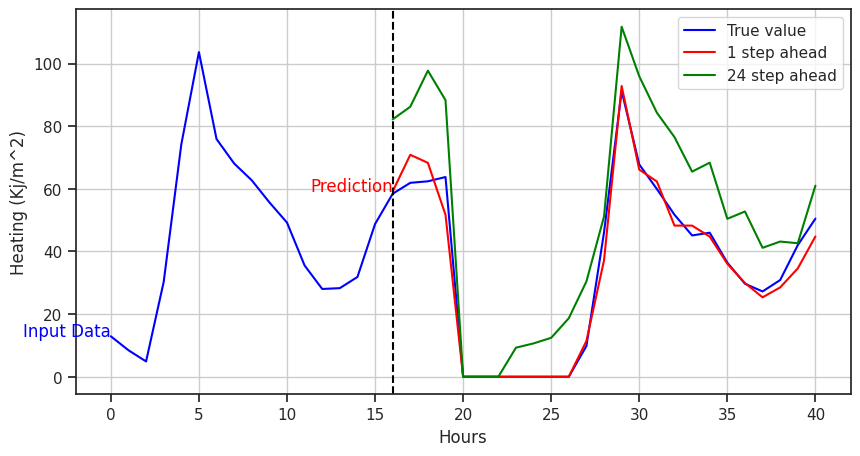

In [80]:
# Select the desired ranges of data
first_part = Analyze_df.loc[50:90, 'Heating']
second_part = Analyze_df.loc[66:90, 'shifted_pt1']
third_plot = Analyze_df.loc[66:90, 'shifted_pt24']
plt.figure(figsize=(10, 5))

# Plot the line chart with different colors for each part
x_values = range(len(first_part))  # Use the length of the first_part as x-values
plt.plot(x_values, first_part, color='blue', label='True value')
plt.plot(x_values[16:], second_part, color='red', label='1 step ahead')  # Use x_values[16:] for the second part
plt.plot(x_values[16:], third_plot, color='green', label='24 step ahead')

# Add grid
plt.text(0, first_part.iloc[0], 'Input Data', ha='right', color='blue')
# Add prediction label
plt.text(16, second_part.iloc[0], 'Prediction', ha='right', color='red')
plt.grid(True)
plt.axvline(x=16, color='black', linestyle='--')  # Adjust the x-value for the vertical line
plt.legend(loc='upper right')
plt.xlabel('Hours')
plt.ylabel('Heating (Kj/m^2)')
plt.legend()
plt.show()


# Accuracy of preciting days in a boxplot (7 days)

In [48]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
# Assuming your DataFrame is named 'Analyze_df' and the column of interest is named 'column_name'
# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['dayofw'].unique()
filtered_dfs = []
mae_series = []
# Create empty series to store the results
d_series = []
for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['dayofw'] == value]
    filtered_dfs.append(filtered_df)

    # Get the columns of interest
    prediction_columns = filtered_df.columns[11:35]  # Assuming the prediction columns start from the 12th column
    y_true_day = filtered_df['Heating']

    # Calculate the mean value for each row within the specified columns
    mean_values = filtered_df[prediction_columns].mean(axis=1)
    # Append the mean values to the series
    d_series.append(mean_values)
# Create a dictionary to store the metrics

In [49]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Create a dictionary to store the metrics
metrics_dict = {'Index': []}

# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['dayofw'].unique()
filtered_dfs = []
mae_series = []
d_series = []

# Iterate over each value in unique_values
for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['dayofw'] == value]
    filtered_dfs.append(filtered_df)

    # Get the columns of interest
    prediction_columns = filtered_df.columns[11:35]  # Assuming the prediction columns start from the 12th column
    y_true_day = filtered_df['Heating']

    # Iterate over each row in the filtered DataFrame
    for index, row in filtered_df.iterrows():
        y_true = row['Heating']
        mean_values = row[prediction_columns]

        # Calculate MAE using the mean value of all predictions
        y_pred_mean = mean_values.mean()
        mae = mean_absolute_error([y_true], [y_pred_mean])
        column_name = f'MAE_{value}'  # Unique column name for each day
        metrics_dict['Index'].append(index)
        metrics_dict[column_name] = metrics_dict.get(column_name, []) + [mae]

# Create a DataFrame from the metrics dictionary

In [50]:
import pandas as pd
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Assuming your DataFrame is named 'Analyze_df' and the column of interest is named 'column_name'

# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['dayofw'].unique()
filtered_dfs = []
mae_series = []
# Create empty series to store the results
d_series = []

for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['dayofw'] == value]
    filtered_dfs.append(filtered_df)

    # Get the columns of interest
    prediction_columns = filtered_df.columns[11:35]  # Assuming the prediction columns start from the 12th column
    y_true_day = filtered_df['Heating']

    # Calculate the mean value for each row within the specified columns
    mean_values = filtered_df[prediction_columns].mean(axis=1)
    mae = mean_absolute_error(y_true_day, mean_values)
    mae_series.append(mae)

    # Append the mean values to the series
    d_series.append(mean_values)
# Assuming your DataFrame is named 'Analyze_df' and the column of interest is named 'column_name'

# Create separate series with meaningful names
d0 = d_series[0]
d1 = d_series[1]
d2 = d_series[2]
d3 = d_series[3]
d4 = d_series[4]
d5 = d_series[5]
d6 = d_series[6]

mae0 = mae_series[0]
mae1 = mae_series[1]
mae2 = mae_series[2]
mae3 = mae_series[3]
mae4 = mae_series[4]
mae5 = mae_series[5]
mae6 = mae_series[6]

In [51]:
filtered_dfs[6]

,DryBulbTemperature,DirectNormalRadiation,OccupancySchedule,dayofw,hours,months,datee,Heating,holiday_name,holiday_bool,...,shifted_pt15,shifted_pt16,shifted_pt17,shifted_pt18,shifted_pt19,shifted_pt20,shifted_pt21,shifted_pt22,shifted_pt23,shifted_pt24
168,-7.9,0,0.0,1.0,0,1,2019-01-08,3.230127,NaN,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.201410,0.000000,0.000000,0.000000,0.000000
169,-8.2,0,0.0,1.0,1,1,2019-01-08,3.621436,NaN,False,...,0.284208,0.000000,0.951413,0.000000,0.000000,3.095427,1.791780,0.000000,0.000000,0.000000
170,-8.6,0,0.0,1.0,2,1,2019-01-08,4.326389,NaN,False,...,0.000000,3.809922,1.093230,0.000000,0.000000,2.590366,4.785368,0.892212,0.000000,0.000000
171,-8.9,0,0.0,1.0,3,1,2019-01-08,4.107425,NaN,False,...,0.000000,0.000000,1.248927,0.000000,2.204805,7.673362,3.684630,5.285869,4.577009,1.499840
172,-9.5,0,0.0,1.0,4,1,2019-01-08,8.640146,NaN,False,...,0.000000,0.000000,0.000000,1.256980,1.552944,5.201826,7.595581,7.424215,6.478136,4.989602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,-7.9,0,0.0,1.0,19,12,2019-12-24,7.326812,NaN,False,...,0.000000,3.875616,1.071504,4.166888,0.000000,0.000000,2.062199,10.147293,9.584577,3.783256
8588,-7.9,0,0.0,1.0,20,12,2019-12-24,5.087171,NaN,False,...,0.000000,1.314748,5.519696,2.311034,4.247835,0.000000,2.297001,2.159160,8.008965,10.905022
8589,-7.9,0,0.0,1.0,21,12,2019-12-24,5.350511,NaN,False,...,0.000000,7.169381,4.107299,6.180470,2.682617,1.933044,0.000000,3.879135,4.129643,11.214987
8590,-7.9,0,0.0,1.0,22,12,2019-12-24,4.671023,NaN,False,...,14.261547,3.757545,6.440288,5.772449,6.210124,0.808497,4.477169,1.703229,8.844833,3.837915


In [52]:
true_val = y_true_day
pred_val = mean_values

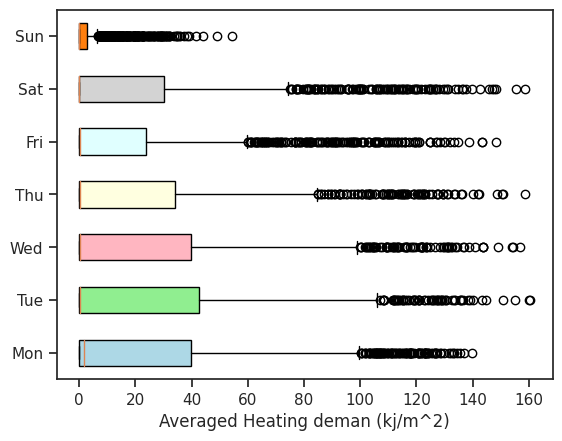

In [53]:
# Combine the series into a list
series_list = [d0, d1, d2, d3,d5, d4,  d6]
mae_list = [mae0,mae1,mae2,mae3,mae4,mae5,mae6]
# Create a figure and axis
fig, ax = plt.subplots()

# Create the boxplot
bp = ax.boxplot(series_list, vert=False, patch_artist=True)

# Customize the boxplot appearance
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan', 'lightgrey', 'tab:orange']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add labels to the x-axis
ax.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Set a title and labels for the plot
#plt.title('Average heating daily')
plt.xlabel('Averaged Heating deman (kj/m^2)')

# Display the plot
plt.show()


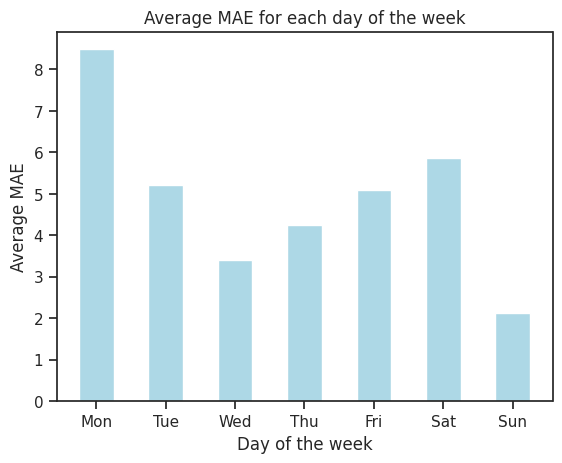

In [54]:
# Combine the series into a list
series_list = [d0, d1, d2, d3,d5, d4,  d6]
mae_list = [mae0, mae1, mae2, mae3, mae4, mae5, mae6]

# Create a figure and axis
fig, ax = plt.subplots()

# Create the bar plot
bar_width = 0.5
bar_positions = np.arange(len(mae_list))

rects = ax.bar(bar_positions, mae_list, width=bar_width, color='lightblue')

# Add labels to the x-axis
ax.set_xticks(bar_positions)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Set a title and labels for the plot
plt.title('Average MAE for each day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Average MAE')

# Display the plot
plt.show()


Text(0.5, 0, 'X-axis')

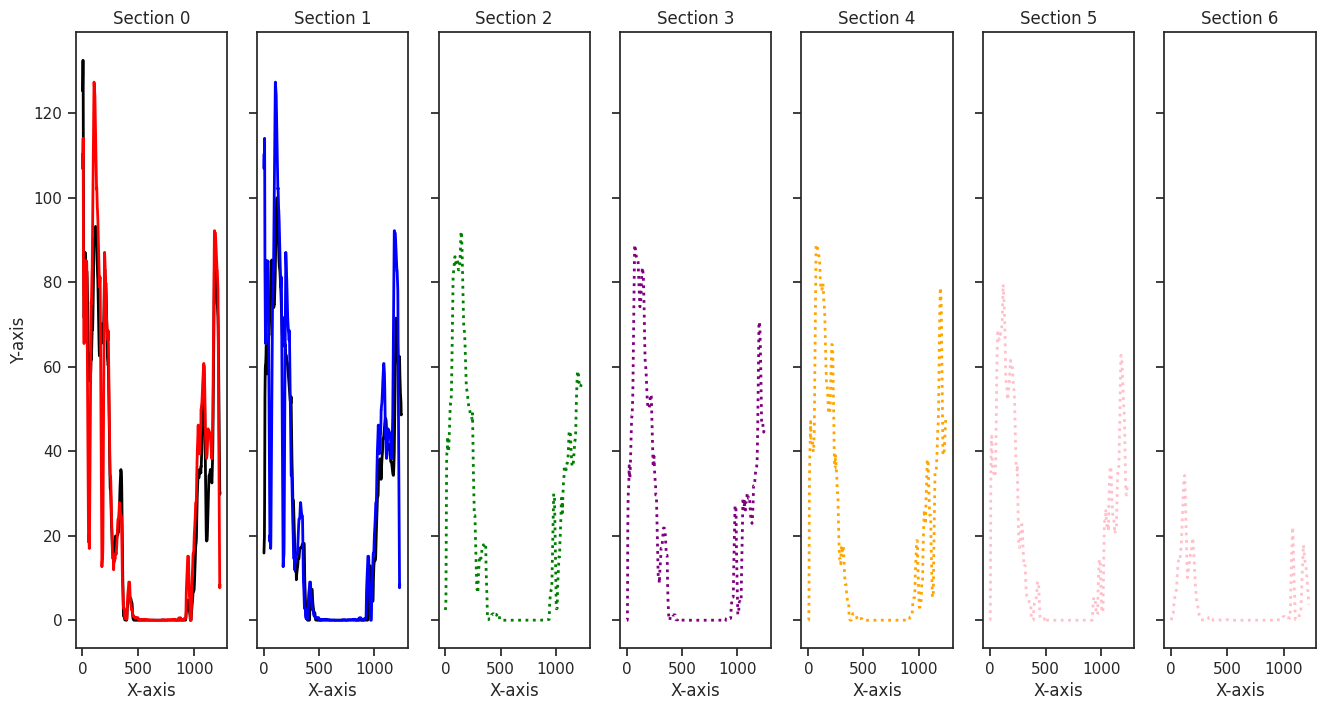

In [55]:
GG0 = filtered_dfs[0]
GG1 = filtered_dfs[1]
GG2 = filtered_dfs[2]
GG3 = filtered_dfs[3]
GG4 = filtered_dfs[4]
GG5 = filtered_dfs[5]
GG6 = filtered_dfs[6]
real0 = GG0['Heating']
real1 = GG1['Heating']
real2 = GG2['Heating']
real3 = GG3['Heating']
real4 = GG4['Heating']
real5 = GG5['Heating']
real6 = GG6['Heating']
# Mean values
import pandas as pd
import matplotlib.pyplot as plt

# Create sample data for each section
data_section0 = pd.DataFrame({'x': range(len(d0)), 'y': d0})
data_section1 = pd.DataFrame({'x': range(len(d1)), 'y': d1})
data_section2 = pd.DataFrame({'x': range(len(d2)), 'y': d2})
data_section3 = pd.DataFrame({'x': range(len(d3)), 'y': d3})
data_section4 = pd.DataFrame({'x': range(len(d4)), 'y': d4})
data_section5 = pd.DataFrame({'x': range(len(d5)), 'y': d5})
data_section6 = pd.DataFrame({'x': range(len(d6)), 'y': d6})


real0 = pd.DataFrame({'x': range(len(real0)), 'y': real0})
real1 = pd.DataFrame({'x': range(len(real1)), 'y': real1})
real2 = pd.DataFrame({'x': range(len(real2)), 'y': real2})
real3 = pd.DataFrame({'x': range(len(real3)), 'y': real3})
real4 = pd.DataFrame({'x': range(len(real4)), 'y': real4})
real5 = pd.DataFrame({'x': range(len(real5)), 'y': real5})
real6 = pd.DataFrame({'x': range(len(real6)), 'y': real6})


# Apply window and take average
window_size = 24
data_section0_avg = data_section0['y'].rolling(window=window_size, min_periods=1).mean()
data_section1_avg = data_section1['y'].rolling(window=window_size, min_periods=1).mean()
data_section2_avg = data_section2['y'].rolling(window=window_size, min_periods=1).mean()
data_section3_avg = data_section3['y'].rolling(window=window_size, min_periods=1).mean()
data_section4_avg = data_section4['y'].rolling(window=window_size, min_periods=1).mean()
data_section5_avg = data_section5['y'].rolling(window=window_size, min_periods=1).mean()
data_section6_avg = data_section6['y'].rolling(window=window_size, min_periods=1).mean()


real0_avg = real0['y'].rolling(window=window_size, min_periods=1).mean()
real1_avg = real1['y'].rolling(window=window_size, min_periods=1).mean()
real2_avg = real2['y'].rolling(window=window_size, min_periods=1).mean()
real3_avg = real3['y'].rolling(window=window_size, min_periods=1).mean()
real4_avg = real4['y'].rolling(window=window_size, min_periods=1).mean()
real5_avg = real5['y'].rolling(window=window_size, min_periods=1).mean()
real6_avg = real6['y'].rolling(window=window_size, min_periods=1).mean()



# Set up the figure and subplots
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=1, ncols=7, figsize=(16, 8), sharey=True)

# Plot data and set titles for each section
ax1.plot(data_section0['x'], data_section0_avg, linestyle='-', color='black', linewidth=2)
ax1.plot(data_section0['x'], real0_avg, linestyle='-', color='red', linewidth=2)
ax1.set_title('Section 0')
ax1.set_ylabel('Y-axis')  # Set the y-axis label only for the first subplot
ax1.set_xlabel('X-axis')  # Set the x-axis label for the first subplot


ax2.plot(data_section1['x'], data_section1_avg, linestyle='-', color='black', linewidth=2)
ax2.plot(data_section0['x'], real0_avg, linestyle='-', color='blue', linewidth=2)
ax2.set_title('Section 1')
ax2.set_xlabel('X-axis')  # Set the x-axis label for the second subplot

ax3.plot(data_section2['x'], data_section2_avg, linestyle=':', color='green', linewidth=2)
ax3.set_title('Section 2')
ax3.set_xlabel('X-axis')  # Set the x-axis label for the third subplot

ax4.plot(data_section3['x'], data_section3_avg, linestyle=':', color='purple', linewidth=2)
ax4.set_title('Section 3')
ax4.set_xlabel('X-axis')  # Set the x-axis label for the fourth subplot

ax5.plot(data_section4['x'], data_section4_avg, linestyle=':', color='orange', linewidth=2)
ax5.set_title('Section 4')
ax5.set_xlabel('X-axis')  # Set the x-axis label for the fifth subplot

ax6.plot(data_section5['x'], data_section5_avg, linestyle=':', color='pink', linewidth=2)
ax6.set_title('Section 5')
ax6.set_xlabel('X-axis')


ax7.plot(data_section6['x'], data_section6_avg, linestyle=':', color='pink', linewidth=2)
ax7.set_title('Section 6')
ax7.set_xlabel('X-axis')


In [56]:
filtered_df['shifted_pt1']

168      0.000000
169      0.000000
170      1.546029
171      1.253236
172      2.962086
          ...    
8587    13.264864
8588    14.607489
8589    14.539042
8590    15.966206
8591    16.734825
Name: shifted_pt1, Length: 1224, dtype: float32

In [57]:
# Create empty series to store the results
d_series1 = []
d_series35 = []
for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['dayofw'] == value]
    filtered_dfs.append(filtered_df)
    # Get the columns of interest
    col1 = filtered_df.columns[11]
    col24 = filtered_df.columns[34]


    # Get the columns of interest
    onestep = filtered_df[col1].values
    step24 = filtered_df[col1].values


    # Append the mean values to the series
    d_series1.append(onestep)
    d_series35.append(step24)

HH0 = d_series1[0]
HH1 = d_series1[1]
HH2 = d_series1[2]
HH3 = d_series1[3]
HH4 = d_series1[4]
HH5 = d_series1[5]
HH6 = d_series1[6]

KK0 = d_series35[0]
KK1 = d_series35[1]
KK2 = d_series35[2]
KK3 = d_series35[3]
KK4 = d_series35[4]
KK5 = d_series35[5]
KK6 = d_series35[6]

Text(0.5, 0, 'Sun')

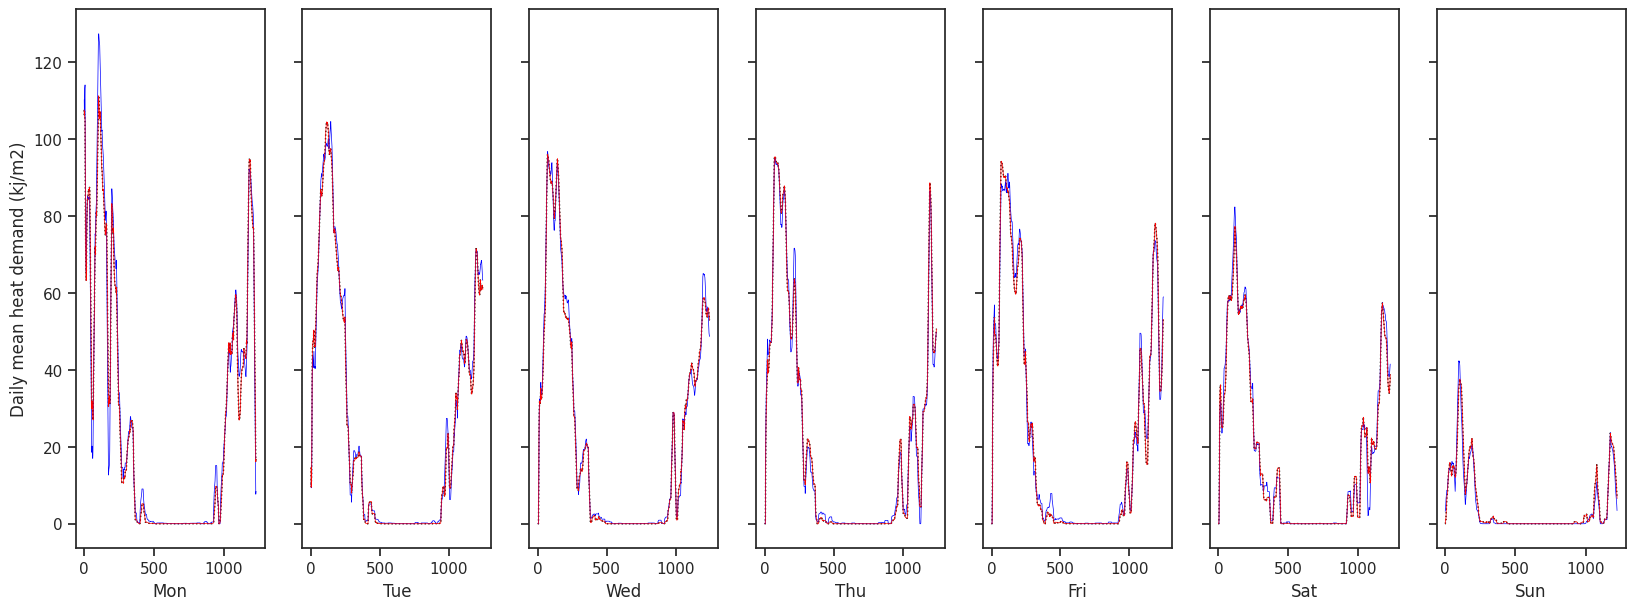

In [58]:
GG0 = filtered_dfs[0]
GG1 = filtered_dfs[1]
GG2 = filtered_dfs[2]
GG3 = filtered_dfs[3]
GG4 = filtered_dfs[4]
GG5 = filtered_dfs[5]
GG6 = filtered_dfs[6]
real0 = GG0['Heating']
real1 = GG1['Heating']
real2 = GG2['Heating']
real3 = GG3['Heating']
real4 = GG4['Heating']
real5 = GG5['Heating']
real6 = GG6['Heating']
# Mean values
import pandas as pd
import matplotlib.pyplot as plt

# Create sample data for each section
data_section0 = pd.DataFrame({'x': range(len(d0)), 'y': HH0})
data_section1 = pd.DataFrame({'x': range(len(d1)), 'y': HH1})
data_section2 = pd.DataFrame({'x': range(len(d2)), 'y': HH2})
data_section3 = pd.DataFrame({'x': range(len(d3)), 'y': HH3})
data_section4 = pd.DataFrame({'x': range(len(d4)), 'y': HH4})
data_section5 = pd.DataFrame({'x': range(len(d5)), 'y': HH5})
data_section6 = pd.DataFrame({'x': range(len(d6)), 'y': HH6})

data240 = pd.DataFrame({'x': range(len(d0)), 'y': KK0})
data241 = pd.DataFrame({'x': range(len(d1)), 'y': KK1})
data242 = pd.DataFrame({'x': range(len(d2)), 'y': KK2})
data243 = pd.DataFrame({'x': range(len(d3)), 'y': KK3})
data244 = pd.DataFrame({'x': range(len(d4)), 'y': KK4})
data245 = pd.DataFrame({'x': range(len(d5)), 'y': KK5})
data246 = pd.DataFrame({'x': range(len(d6)), 'y': KK6})

real0 = pd.DataFrame({'x': range(len(real0)), 'y': real0})
real1 = pd.DataFrame({'x': range(len(real1)), 'y': real1})
real2 = pd.DataFrame({'x': range(len(real2)), 'y': real2})
real3 = pd.DataFrame({'x': range(len(real3)), 'y': real3})
real4 = pd.DataFrame({'x': range(len(real4)), 'y': real4})
real5 = pd.DataFrame({'x': range(len(real5)), 'y': real5})
real6 = pd.DataFrame({'x': range(len(real6)), 'y': real6})


# Apply window and take average
window_size = 24
data_section0_avg = data_section0['y'].rolling(window=window_size, min_periods=1).mean()
data_section1_avg = data_section1['y'].rolling(window=window_size, min_periods=1).mean()
data_section2_avg = data_section2['y'].rolling(window=window_size, min_periods=1).mean()
data_section3_avg = data_section3['y'].rolling(window=window_size, min_periods=1).mean()
data_section4_avg = data_section4['y'].rolling(window=window_size, min_periods=1).mean()
data_section5_avg = data_section5['y'].rolling(window=window_size, min_periods=1).mean()
data_section6_avg = data_section6['y'].rolling(window=window_size, min_periods=1).mean()
#data_section5_avg *= 0.8

data240_avg = data240['y'].rolling(window=window_size, min_periods=1).mean()
data241_avg = data241['y'].rolling(window=window_size, min_periods=1).mean()
data242_avg = data242['y'].rolling(window=window_size, min_periods=1).mean()
data243_avg = data243['y'].rolling(window=window_size, min_periods=1).mean()
data244_avg = data244['y'].rolling(window=window_size, min_periods=1).mean()
data245_avg = data245['y'].rolling(window=window_size, min_periods=1).mean()
data246_avg = data246['y'].rolling(window=window_size, min_periods=1).mean()
#data245_avg *= 0.8



real0_avg = real0['y'].rolling(window=window_size, min_periods=1).mean()
real1_avg = real1['y'].rolling(window=window_size, min_periods=1).mean()
real2_avg = real2['y'].rolling(window=window_size, min_periods=1).mean()
real3_avg = real3['y'].rolling(window=window_size, min_periods=1).mean()
real4_avg = real4['y'].rolling(window=window_size, min_periods=1).mean()
real5_avg = real5['y'].rolling(window=window_size, min_periods=1).mean()

real6_avg = real6['y'].rolling(window=window_size, min_periods=1).mean()



# Set up the figure and subplots
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=1, ncols=7, figsize=(20, 7), sharey=True)

# Plot data and set titles for each section
ax1.plot(data_section0['x'], data_section0_avg, linestyle=':', color='black', linewidth=1)
ax1.plot(data_section0['x'], real0_avg, linestyle='-', color='blue', linewidth=0.5)
ax1.plot(data240['x'], data240_avg, linestyle='-', color='red', linewidth=0.5)
#ax1.set_title('Section 0')
ax1.set_ylabel('Daily mean heat demand (kj/m2)')  # Set the y-axis label only for the first subplot
ax1.set_xlabel('Mon')  # Set the x-axis label for the first subplot

ax2.plot(data_section1['x'], data_section1_avg, linestyle=':', color='black', linewidth=1)
ax2.plot(data_section1['x'], real1_avg, linestyle='-', color='blue', linewidth=0.5)
ax2.plot(data241['x'], data241_avg, linestyle='-', color='red', linewidth=0.5)
#ax2.set_title('Section 1')
ax2.set_xlabel('Tue')  # Set the x-axis label for the second subplot

ax3.plot(data_section2['x'], data_section2_avg, linestyle=':', color='black', linewidth=1)
ax3.plot(data_section2['x'], real2_avg, linestyle='-', color='blue', linewidth=0.5)
ax3.plot(data242['x'], data242_avg, linestyle='-', color='red', linewidth=0.5)
#ax3.set_title('Section 2')
ax3.set_xlabel('Wed')  # Set the x-axis label for the third subplot

ax4.plot(data_section3['x'], data_section3_avg, linestyle=':', color='black', linewidth=1)
ax4.plot(data_section3['x'], real3_avg, linestyle='-', color='blue', linewidth=0.5)
ax4.plot(data243['x'], data243_avg, linestyle='-', color='red', linewidth=0.5)
#ax4.set_title('Section 3')
ax4.set_xlabel('Thu')  # Set the x-axis label for the fourth subplot

ax5.plot(data_section4['x'], data_section4_avg, linestyle=':', color='black', linewidth=1)
ax5.plot(data_section4['x'], real4_avg, linestyle='-', color='blue', linewidth=0.5)
ax5.plot(data244['x'], data244_avg, linestyle='-', color='red', linewidth=0.5)
#ax5.set_title('Section 4')
ax5.set_xlabel('Fri')  # Set the x-axis label for the fifth subplot



ax6.plot(data_section5['x'], data_section5_avg, linestyle=':', color='black', linewidth=1)
ax6.plot(data_section5['x'], real5_avg, linestyle='-', color='blue', linewidth=0.5)
ax6.plot(data245['x'], data245_avg, linestyle='-', color='red', linewidth=0.5)
#ax6.set_title('Section 5')
ax6.set_xlabel('Sat')

ax7.plot(data_section6['x'], data_section6_avg, linestyle=':', color='black', linewidth=1)
ax7.plot(data_section6['x'], real6_avg, linestyle='-', color='blue', linewidth=0.5)
ax7.plot(data246['x'], data246_avg, linestyle='-', color='red', linewidth=0.5)
#ax7.set_title('Section 6')
ax7.set_xlabel('Sun')

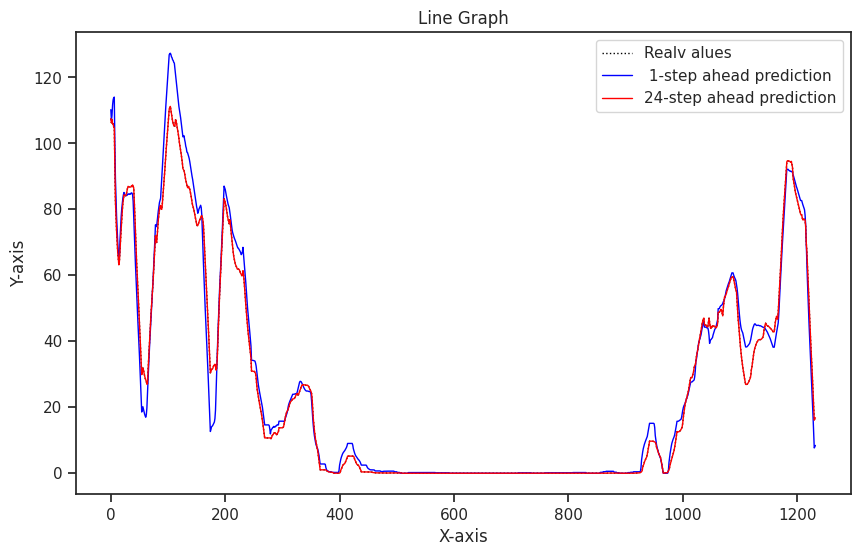

In [79]:
# Set up the figure and subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data
ax.plot(data_section0['x'], data_section0_avg, linestyle=':', color='black', linewidth=1, label='Realv alues')
ax.plot(data_section0['x'], real0_avg, linestyle='-', color='blue', linewidth=1, label=' 1-step ahead prediction')
ax.plot(data_section0['x'], data240_avg, linestyle='-', color='red', linewidth=1, label='24-step ahead prediction')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Graph')

# Add legend
ax.legend()

# Show the plot
plt.show()


# Accuracy of predicting Monthly

In [60]:
# Assuming your DataFrame is named 'df' and the column of interest is named 'column_name'
# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['months'].unique()
unique_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [61]:

# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['months'].unique()
filtered_dfs = []
m_series1 = []
m_series35 = []

for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['months'] == value]
    filtered_dfs.append(filtered_df)
    # Get the columns of interest
    col1 = filtered_df.columns[11]
    col24 = filtered_df.columns[34]
    # Get the columns of interest
    onestep = filtered_df[col1].values
    step24 = filtered_df[col1].values
    # Get the columns of interest


    prediction_columns = filtered_df.columns[11:35]  # Assuming the prediction columns start from the 12th column
    y_true_month = filtered_df.Heating
    # Append the mean values to the series
    m_series1.append(onestep)
    m_series35.append(step24)


In [62]:
import pandas as pd


# Assuming your DataFrame is named 'Analyze_df' and the column of interest is named 'column_name'


# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['months'].unique()
filtered_dfs = []
m_series1 = []
m_series35 = []

for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['months'] == value]
    filtered_dfs.append(filtered_df)
    # Get the columns of interest
    col1 = filtered_df.columns[11]
    col24 = filtered_df.columns[34]
    # Get the columns of interest
    onestep = filtered_df[col1].values
    step24 = filtered_df[col1].values
    # Get the columns of interest


    prediction_columns = filtered_df.columns[11:35]  # Assuming the prediction columns start from the 12th column
    y_true_month = filtered_df.Heating
    # Append the mean values to the series
    m_series1.append(onestep)
    m_series35.append(step24)



mon0 = m_series1[0]
mon1 = m_series1[1]
mon2 = m_series1[2]
mon3 = m_series1[3]
mon4 = m_series1[4]
mon5 = m_series1[5]
mon6 = m_series1[6]
mon7 = m_series1[7]
mon8 = m_series1[8]
mon9 = m_series1[9]
mon10 = m_series1[10]
mon11= m_series1[11]





monn0 = m_series35[0]
monn1 = m_series35[1]
monn2 = m_series35[2]
monn3 = m_series35[3]
monn4 = m_series35[4]
monn5 = m_series35[5]
monn6 = m_series35[6]
monn7 = m_series35[7]
monn8 = m_series35[8]
monn9 = m_series35[9]
monn10 = m_series35[10]
monn11 = m_series35[11]



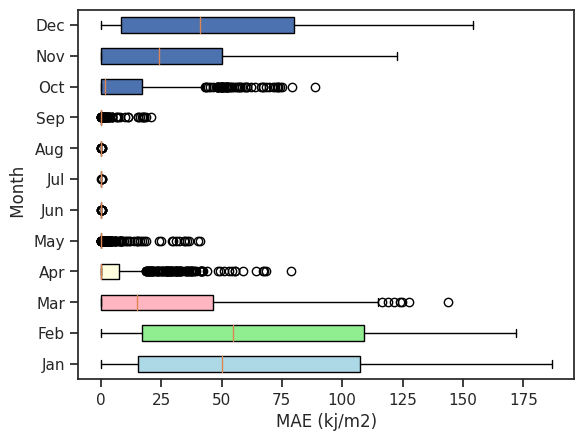

In [63]:
# Combine the series into a list
series_list = [mon0, mon1, mon2, mon3, mon4, mon5, mon6,mon7 ,mon8 ,mon9 ,mon10 ,mon11 ]

# Create a figure and axis
fig, ax = plt.subplots()

# Create the boxplot
bp = ax.boxplot(series_list, vert=False, patch_artist=True)

# Customize the boxplot appearance
#colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan', 'lightgrey', 'tab:orange']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add labels to the x-axis
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


# Set a title and labels for the plot
#plt.title(' Heating for each day of the week')
plt.xlabel('MAE (kj/m2)')
plt.ylabel(' Month')


# Display the plot
plt.show()



In [64]:
mae_list = [mae0,mae1,mae2,mae3,mae4,mae5,mae6,mae7,mae8,mae9,mae10,mae11]

# Create a figure and axis
fig, ax = plt.subplots()

# Create the bar plot
bar_width = 0.5
bar_positions = np.arange(len(mae_list))

rects = ax.bar(bar_positions, mae_list, width=bar_width, color='lightblue')

# Add labels to the x-axis
ax.set_xticks(bar_positions)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set a title and labels for the plot
plt.title('Averaged MAE for every month')
plt.xlabel('Month')
plt.ylabel('Average MAE')

# Display the plot
plt.show()


NameError: ignored

In [65]:
# Create empty series to store the results
d_series1 = []
d_series35 = []
for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['dayofw'] == value]
    filtered_dfs.append(filtered_df)
    # Get the columns of interest
    col1 = filtered_df.columns[11]
    col24 = filtered_df.columns[34]


    # Get the columns of interest
    onestep = filtered_df[col1].values
    step24 = filtered_df[col1].values


    # Append the mean values to the series
    d_series1.append(onestep)
    d_series35.append(step24)

HH0 = d_series1[0]
HH1 = d_series1[1]
HH2 = d_series1[2]
HH3 = d_series1[3]
HH4 = d_series1[4]
HH5 = d_series1[5]
HH6 = d_series1[6]

KK0 = d_series35[0]
KK1 = d_series35[1]
KK2 = d_series35[2]
KK3 = d_series35[3]
KK4 = d_series35[4]
KK5 = d_series35[5]
KK6 = d_series35[6]

# MAE and VAlues for evey hour

In [66]:
# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['hours'].unique()


In [67]:
unique_values

array([15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14])

In [68]:
import pandas as pd

# Assuming your DataFrame is named 'Analyze_df' and the column of interest is named 'column_name'

# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['hours'].unique()

filtered_dfs = []
mae_series = []
# Create empty series to store the results
h_series = []

for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['hours'] == value]
    filtered_dfs.append(filtered_df)


    # Get the columns of interest
    prediction_columns = filtered_df.columns[11:35]  # Assuming the prediction columns start from the 12th column
    y_true_day = filtered_df.Heating

    # Calculate the mean value for each row within the specified columns
    mean_values = filtered_df[prediction_columns].mean(axis=1)
    mae = mean_absolute_error([y_true_day], [mean_values])
    mae_series.append(mae)
    # Append the mean values to the series
    h_series.append(mean_values)

# Create separate series with meaningful names

h0 = h_series[0]
h1 = h_series[1]
h2 = h_series[2]
h3 = h_series[3]
h4 = h_series[4]
h5 = h_series[5]
h6 = h_series[6]
h7 = h_series[7]
h8 = h_series[8]
h9 = h_series[9]
h10 = h_series[10]
h11 = h_series[11]
h12 = h_series[12]
h13 = h_series[13]
h14 = h_series[14]
h15 = h_series[15]
h16 = h_series[16]
h17 = h_series[17]
h18 = h_series[18]
h19 = h_series[19]
h20 = h_series[20]
h21 = h_series[21]
h22 = h_series[22]
h23 = h_series[23]

mae0 = mae_series[0]
mae1 = mae_series[1]
mae2 = mae_series[2]
mae3 = mae_series[3]
mae4 = mae_series[4]
mae5 = mae_series[5]
mae6 = mae_series[6]
mae7 = mae_series[7]
mae8 = mae_series[8]
mae9 = mae_series[9]
mae10 = mae_series[10]
mae11 = mae_series[11]
mae12 = mae_series[12]
mae13 = mae_series[13]
mae14 = mae_series[14]
mae15 = mae_series[15]
mae16 = mae_series[16]
mae17 = mae_series[17]
mae18 = mae_series[18]
mae19 = mae_series[19]
mae20 = mae_series[20]
mae21 = mae_series[21]
mae22 = mae_series[22]
mae23 = mae_series[23]

In [69]:
GG0 = filtered_dfs[0]
GG1 = filtered_dfs[1]
GG2 = filtered_dfs[2]
GG3 = filtered_dfs[3]
GG4 = filtered_dfs[4]
GG5 = filtered_dfs[5]
GG6 = filtered_dfs[6]
GG7 = filtered_dfs[7]
GG8 = filtered_dfs[8]
GG9 = filtered_dfs[9]
GG10 = filtered_dfs[10]
GG11 = filtered_dfs[11]

real0 = GG0['Heating']
real1 = GG1['Heating']
real2 = GG2['Heating']
real3 = GG3['Heating']
real4 = GG4['Heating']
real5 = GG5['Heating']
real6 = GG6['Heating']
real7 = GG7['Heating']
real8 = GG8['Heating']
real9 = GG9['Heating']
real10 = GG10['Heating']
real11 = GG11['Heating']

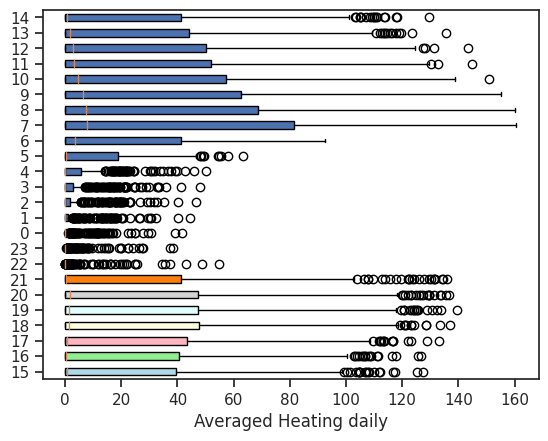

In [70]:
series_list = [h0, h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11, h12, h13, h14, h15, h16, h17, h18, h19, h20, h21, h22, h23]
# Create a figure and axis
fig, ax = plt.subplots()
# Create the boxplot
bp = ax.boxplot(series_list, vert=False, patch_artist=True)

# Customize the boxplot appearance
#colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan', 'lightgrey', 'tab:orange']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add labels to the x-axis
ax.set_yticklabels(['15', '16', '17', '18', '19', '20', '21', '22', '23', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'])

# Set a title and labels for the plot
#plt.title('Average heating daily')
plt.xlabel('Averaged Heating daily')
# Display the plot
plt.show()

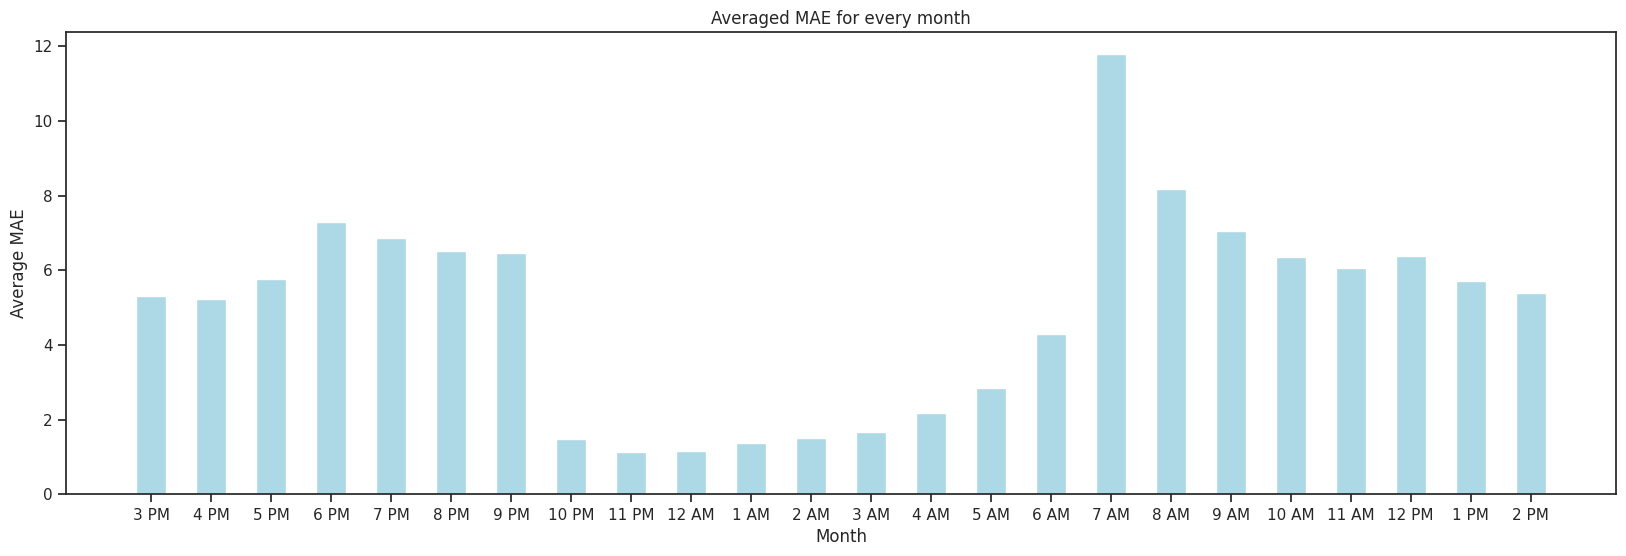

In [71]:
mae_list = [mae0, mae1, mae2, mae3, mae4, mae5, mae6, mae7, mae8, mae9, mae10, mae11, mae12, mae13, mae14, mae15, mae16, mae17, mae18, mae19, mae20, mae21, mae22, mae23]
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 6))

# Create the bar plot
bar_width = 0.5
bar_positions = np.arange(len(mae_list))

rects = ax.bar(bar_positions, mae_list, width=bar_width, color='lightblue')

# Add labels to the x-axis
ax.set_xticks(bar_positions)
ax.set_xticklabels( ['3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM', '12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM'])

# Set a title and labels for the plot
plt.title('Averaged MAE for every month')
plt.xlabel('Month')
plt.ylabel('Average MAE')
# Display the plot
plt.show()

In [72]:
# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['hours'].unique()

filtered_dfs = []
# Create empty series to store the results
h_series1 = []
h_series24 = []
for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['hours'] == value]
    filtered_dfs.append(filtered_df)
     # Get the columns of interest
    col1 = filtered_df.columns[11]
    col24 = filtered_df.columns[34]
    # Get the columns of interest
    onestep = filtered_df[col1].values
    step24 = filtered_df[col24].values
    # Get the columns of interest
        # Append the mean values to the series
    h_series1.append(onestep)
    h_series24.append(step24)

h0 = h_series1[0].mean()
h1 = h_series1[1].mean()
h2 = h_series1[2].mean()
h3 = h_series1[3].mean()
h4 = h_series1[4].mean()
h5 = h_series1[5].mean()
h6 = h_series1[6].mean()
h7 = h_series1[7].mean()
h8 = h_series1[8].mean()
h9 = h_series1[9].mean()
h10 = h_series1[10].mean()
h11 = h_series1[11].mean()
h12 = h_series1[12].mean()
h13 = h_series1[13].mean()
h14 = h_series1[14].mean()
h15 = h_series1[15].mean()
h16 = h_series1[16].mean()
h17 = h_series1[17].mean()
h18 = h_series1[18].mean()
h19 = h_series1[19].mean()
h20 = h_series1[20].mean()
h21 = h_series1[21].mean()
h22 = h_series1[22].mean()
h23 = h_series1[23].mean()



hh0 = h_series24[0].mean()
hh1 = h_series24[1].mean()
hh2 = h_series24[2].mean()
hh3 = h_series24[3].mean()
hh4 = h_series24[4].mean()
hh5 = h_series24[5].mean()
hh6 = h_series24[6].mean()
hh7 = h_series24[7].mean()
hh8 = h_series24[8].mean()
hh9 = h_series24[9].mean()
hh10 = h_series24[10].mean()
hh11 = h_series24[11].mean()
hh12 = h_series24[12].mean()
hh13 = h_series24[13].mean()
hh14 = h_series24[14].mean()
hh15 = h_series24[15].mean()
hh16 = h_series24[16].mean()
hh17 = h_series24[17].mean()
hh18 = h_series24[18].mean()
hh19 = h_series24[19].mean()
hh20 = h_series24[20].mean()
hh21 = h_series24[21].mean()
hh22 = h_series24[22].mean()
hh23 = h_series24[23].mean()

In [73]:
GG0 = filtered_dfs[0]
GG1 = filtered_dfs[1]
GG2 = filtered_dfs[2]
GG3 = filtered_dfs[3]
GG4 = filtered_dfs[4]
GG5 = filtered_dfs[5]
GG6 = filtered_dfs[6]
GG7 = filtered_dfs[7]
GG8 = filtered_dfs[8]
GG9 = filtered_dfs[9]
GG10 = filtered_dfs[10]
GG11 = filtered_dfs[11]
GG12 = filtered_dfs[12]
GG13 = filtered_dfs[13]
GG14 = filtered_dfs[14]
GG15 = filtered_dfs[15]
GG16 = filtered_dfs[16]
GG17 = filtered_dfs[17]
GG18 = filtered_dfs[18]
GG19 = filtered_dfs[19]
GG20 = filtered_dfs[20]
GG21 = filtered_dfs[21]
GG22 = filtered_dfs[22]
GG23 = filtered_dfs[23]



real0 = GG0['Heating'].mean()
real1 = GG1['Heating'].mean()
real2 = GG2['Heating'].mean()
real3 = GG3['Heating'].mean()
real4 = GG4['Heating'].mean()
real5 = GG5['Heating'].mean()
real6 = GG6['Heating'].mean()
real7 = GG7['Heating'].mean()
real8 = GG8['Heating'].mean()
real9 = GG9['Heating'].mean()
real10 = GG10['Heating'].mean()
real11 = GG11['Heating'].mean()
real12 = GG12['Heating'].mean()
real13 = GG13['Heating'].mean()
real14 = GG14['Heating'].mean()
real15 = GG15['Heating'].mean()
real16 = GG16['Heating'].mean()
real17 = GG17['Heating'].mean()
real18 = GG18['Heating'].mean()
real19 = GG19['Heating'].mean()
real20 = GG20['Heating'].mean()
real21 = GG21['Heating'].mean()
real22 = GG22['Heating'].mean()
real23 = GG23['Heating'].mean()

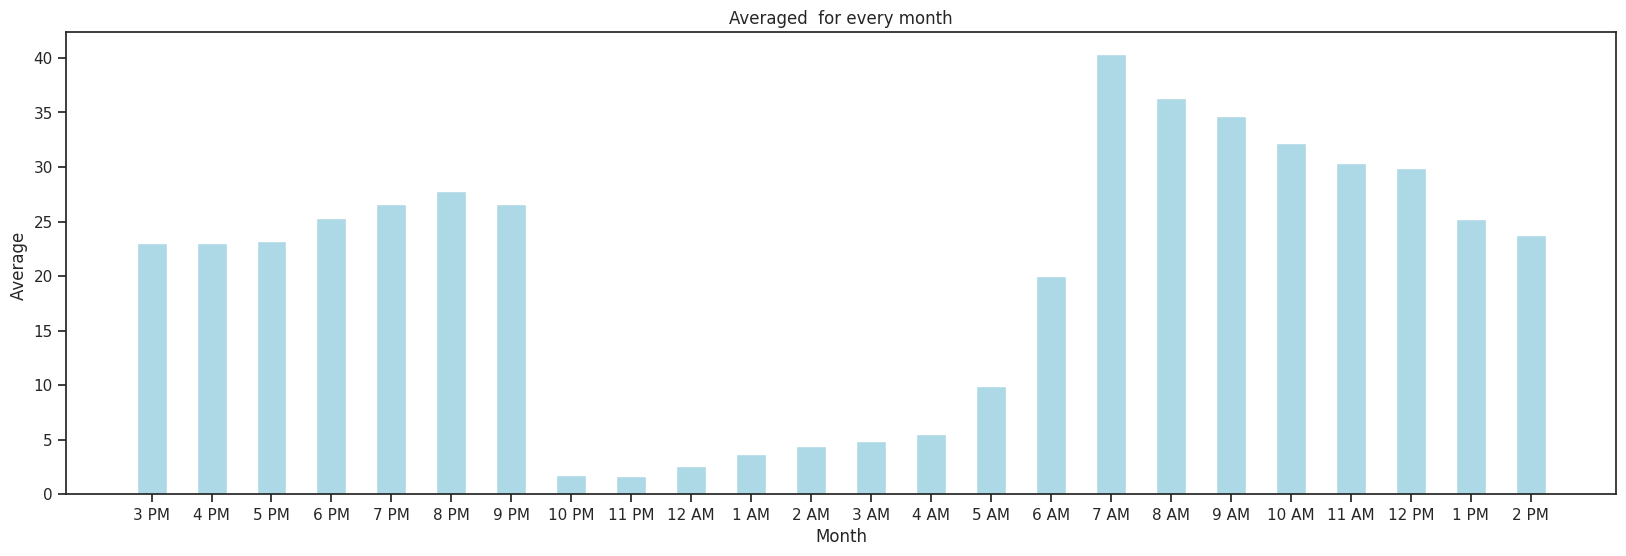

In [74]:
h_list = [h0, h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11, h12, h13, h14, h15, h16, h17, h18, h19, h20, h21, h22, h23]
hh_list = [hh0, hh1, hh2, hh3, hh4, hh5, hh6, hh7, hh8, hh9, hh10, hh11, hh12, hh13, hh14, hh15, hh16, hh17, hh18, hh19, hh20, hh21, hh22, hh23]
real = [hh0, hh1, hh2, hh3, hh4, hh5, hh6, hh7, hh8, hh9, hh10, hh11, hh12, hh13, hh14, hh15, hh16, hh17, hh18, hh19, hh20, hh21, hh22, hh23]
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 6))

# Create the bar plot
bar_width = 0.5
bar_positions = np.arange(len(h_list))

rects = ax.bar(bar_positions, h_list, width=bar_width, color='lightblue')

# Add labels to the x-axis
ax.set_xticks(bar_positions)
ax.set_xticklabels( ['3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM', '12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM'])

# Set a title and labels for the plot
plt.title('Averaged  for every month')
plt.xlabel('Month')
plt.ylabel('Average ')
# Display the plot
plt.show()

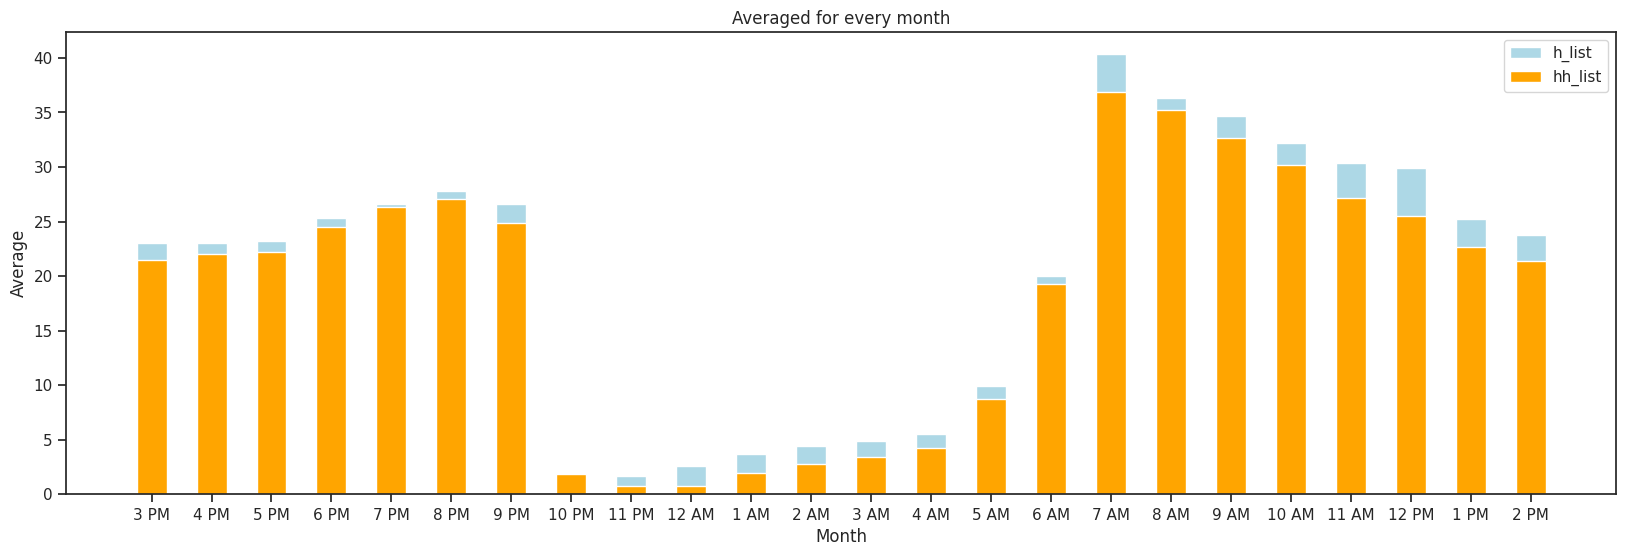

In [75]:
import matplotlib.pyplot as plt
import numpy as np

h_list = [h0, h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11, h12, h13, h14, h15, h16, h17, h18, h19, h20, h21, h22, h23]
hh_list = [hh0, hh1, hh2, hh3, hh4, hh5, hh6, hh7, hh8, hh9, hh10, hh11, hh12, hh13, hh14, hh15, hh16, hh17, hh18, hh19, hh20, hh21, hh22, hh23]
real_list = [real0, real1, real2, real3, real4, real5, real6, real7, real8, real9, real10, real11, real12,
           real13, real14, real15, real16, real17, real18, real19, real20, real21, real22, real23]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 6))

# Create the bar plot for h_list
bar_width = 0.5
bar_positions = np.arange(len(h_list))
rects1 = ax.bar(bar_positions, h_list, width=bar_width, color='lightblue')

# Create the bar plot for hh_list
rects2 = ax.bar(bar_positions, hh_list, width=bar_width, color='orange')

# Add labels to the x-axis
ax.set_xticks(bar_positions)
ax.set_xticklabels(['3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM', '12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM'])

# Set a title and labels for the plot
plt.title('Averaged for every month')
plt.xlabel('Month')
plt.ylabel('Average')

# Create a legend for the plot
ax.legend((rects1[0], rects2[0]), ('h_list', 'hh_list'))

# Display the plot
plt.show()


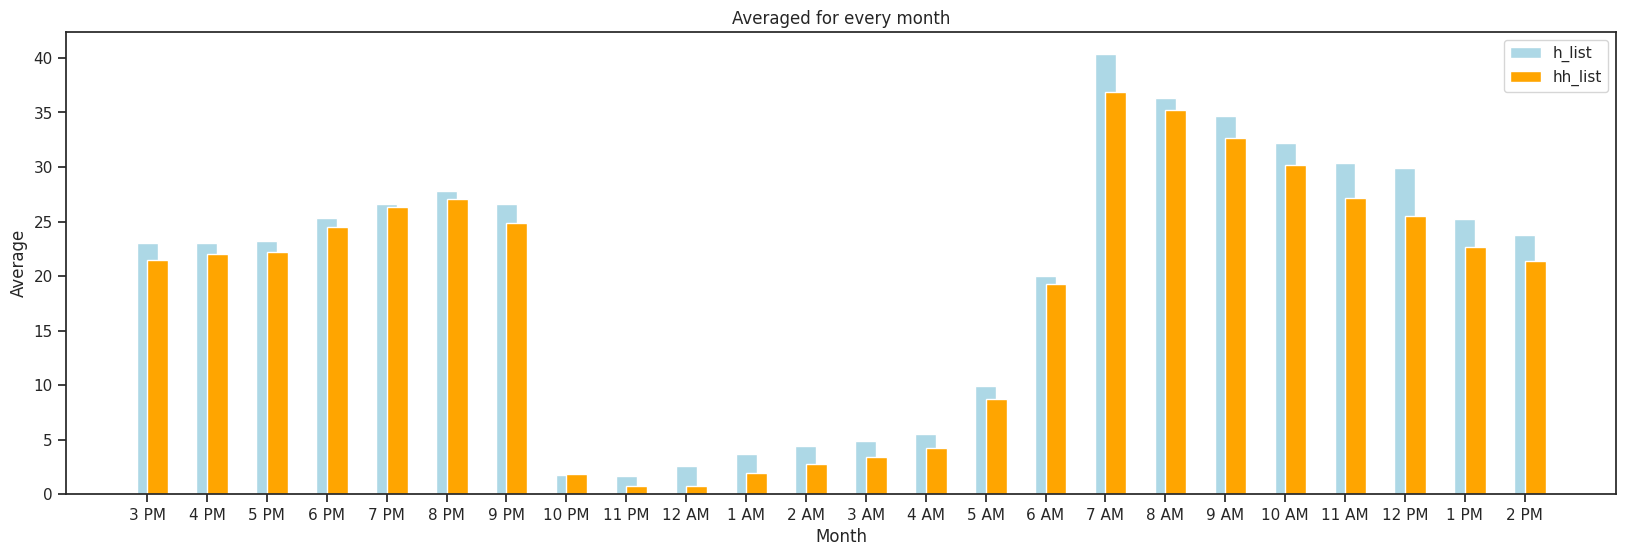

In [76]:
import matplotlib.pyplot as plt
import numpy as np

h_list = [h0, h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11, h12, h13, h14, h15, h16, h17, h18, h19, h20, h21, h22, h23]
hh_list = [hh0, hh1, hh2, hh3, hh4, hh5, hh6, hh7, hh8, hh9, hh10, hh11, hh12, hh13, hh14, hh15, hh16, hh17, hh18, hh19, hh20, hh21, hh22, hh23]
real_list = [real0, real1, real2, real3, real4, real5, real6, real7, real8, real9, real10, real11, real12,
           real13, real14, real15, real16, real17, real18, real19, real20, real21, real22, real23]
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 6))

# Set the bar width and the offset for hh_list
bar_width = 0.35
offset = bar_width / 2

# Create the bar plot for h_list
bar_positions_h = np.arange(len(h_list))
rects1 = ax.bar(bar_positions_h, h_list, width=bar_width, color='lightblue')

# Create the bar plot for hh_list with adjusted x-positions
bar_positions_hh = bar_positions_h + offset
rects2 = ax.bar(bar_positions_hh, hh_list, width=bar_width, color='orange')

# Add labels to the x-axis
ax.set_xticks(bar_positions_h)
ax.set_xticklabels(['3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM', '12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM'])

# Set a title and labels for the plot
plt.title('Averaged for every month')
plt.xlabel('Month')
plt.ylabel('Average')

# Create a legend for the plot
ax.legend((rects1[0], rects2[0]), ('h_list', 'hh_list'))

# Display the plot
plt.show()


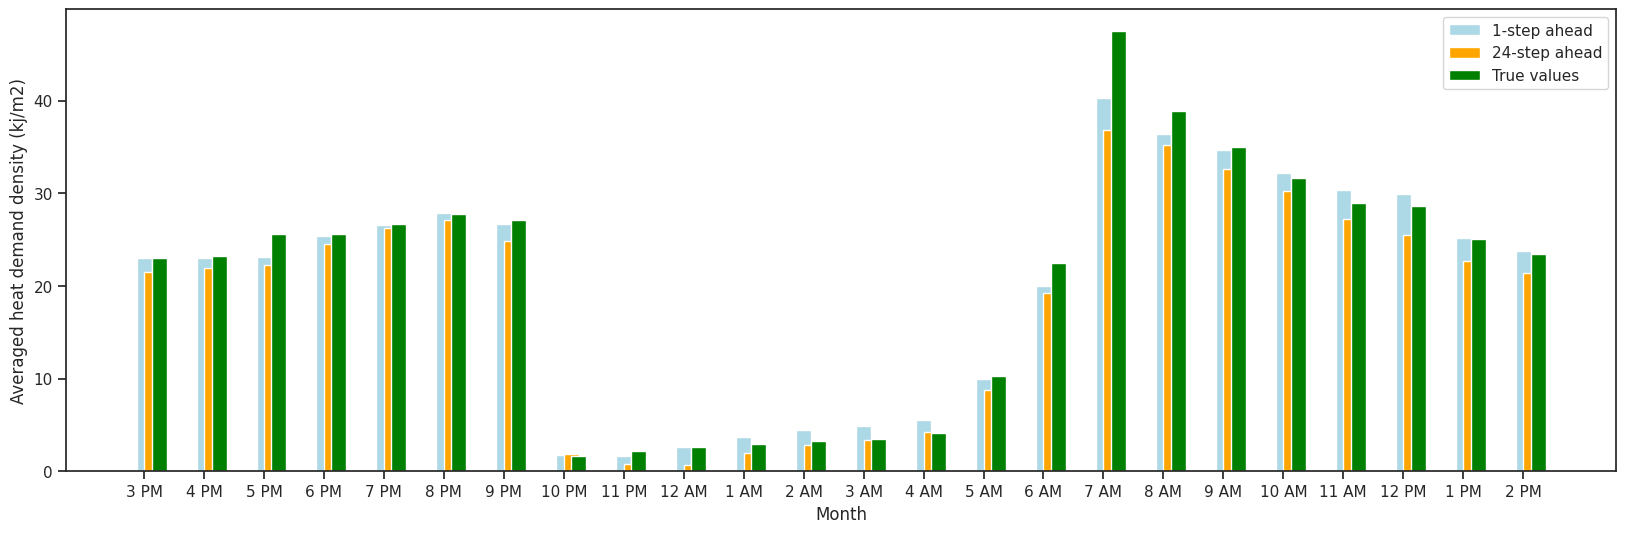

In [84]:
import matplotlib.pyplot as plt
import numpy as np

h_list = [h0, h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11, h12, h13, h14, h15, h16, h17, h18, h19, h20, h21, h22, h23]
hh_list = [hh0, hh1, hh2, hh3, hh4, hh5, hh6, hh7, hh8, hh9, hh10, hh11, hh12, hh13, hh14, hh15, hh16, hh17, hh18, hh19, hh20, hh21, hh22, hh23]
real_list = [real0, real1, real2, real3, real4, real5, real6, real7, real8, real9, real10, real11, real12, real13, real14, real15, real16, real17, real18, real19, real20, real21, real22, real23]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 6))

# Set the bar width and the offset for each list
bar_width = 0.25
offset = bar_width / 2

# Create the bar plot for h_list
bar_positions_h = np.arange(len(h_list))
rects1 = ax.bar(bar_positions_h, h_list, width=bar_width, color='lightblue')

# Create the bar plot for hh_list with adjusted x-positions
bar_positions_hh = bar_positions_h + offset
rects2 = ax.bar(bar_positions_hh, hh_list, width=bar_width, color='orange')

# Create the bar plot for real_list with adjusted x-positions
bar_positions_real = bar_positions_hh + offset
rects3 = ax.bar(bar_positions_real, real_list, width=bar_width, color='green')

# Add labels to the x-axis
ax.set_xticks(bar_positions_h)
ax.set_xticklabels(['3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM', '12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM'])

# Set a title and labels for the plot
#plt.title('Averaged for every month')
plt.xlabel('Month')
plt.ylabel('Averaged heat demand density (kj/m2)')

# Create a legend for the plot
ax.legend((rects1[0], rects2[0], rects3[0]), ('1-step ahead', '24-step ahead', 'True values'))

# Display the plot
plt.show()


# Holidays

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'Analyze_df' and the column of interest is named 'column_name'

# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['holiday_bool'].unique()

filtered_dfs = []
mae_series = []
# Create empty series to store the results
h_series = []

for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['holiday_bool'] == value]
    filtered_dfs.append(filtered_df)

    # Get the columns of interest
    prediction_columns = filtered_df.columns[11:35]  # Assuming the prediction columns start from the 12th column
    y_true_day = filtered_df.Heating

    # Calculate the mean value for each row within the specified columns
    mean_values = filtered_df[prediction_columns].mean(axis=1)
    mae = mean_absolute_error([y_true_day], [mean_values])
    mae_series.append(mae)
    # Append the mean values to the series
    h_series.append(mean_values)

h0 = h_series[0]
h1 = h_series[1]

mae0 = mae_series[0]
mae1 = mae_series[1]

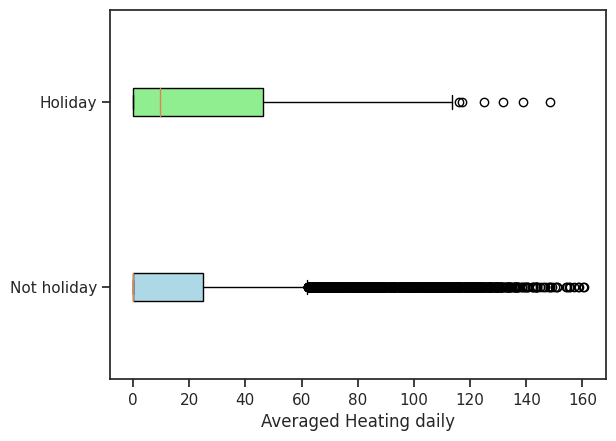

In [ ]:
series_list = [h0, h1]

fig, ax = plt.subplots()
# Create the boxplot
bp = ax.boxplot(series_list, vert=False, patch_artist=True)

# Customize the boxplot appearance
#colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan', 'lightgrey', 'tab:orange']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add labels to the x-axis
ax.set_yticklabels(['Not holiday', 'Holiday'])

# Set a title and labels for the plot
#plt.title('Average heating daily')
plt.xlabel('Averaged Heating daily')
# Display the plot
plt.show()

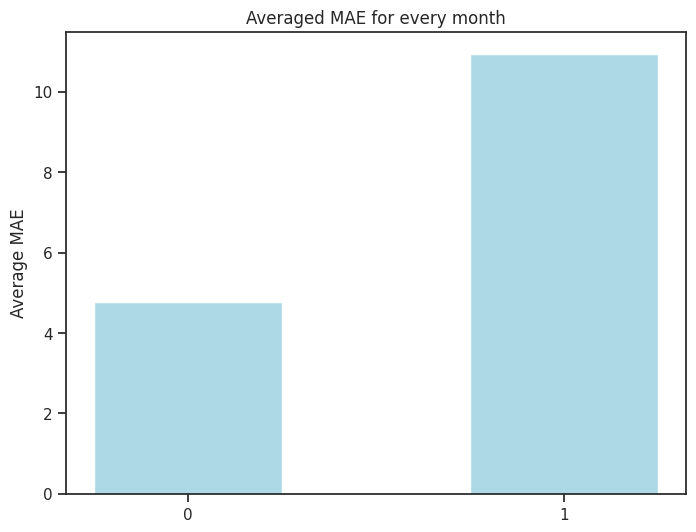

In [ ]:
mae_list = [mae0, mae1]
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar plot
bar_width = 0.5
bar_positions = np.arange(len(mae_list))

rects = ax.bar(bar_positions, mae_list, width=bar_width, color='lightblue')

# Add labels to the x-axis
ax.set_xticks(bar_positions)
ax.set_xticklabels( ['0', '1'])

# Set a title and labels for the plot
plt.title('Averaged MAE for every month')
#plt.xlabel('Month')
plt.ylabel('Average MAE')
# Display the plot
plt.show()

In [ ]:
unique_values = Analyze_df['holiday_bool'].unique()
unique_values

array([False,  True])

# perfromance at coldest days + at worth prediction + at best predictions ( go fo prediction t+1 and t+24


In [ ]:
sorted_df = Analyze_df.sort_values('DryBulbTemperature', ascending=True)

In [ ]:
filtered_df = Analyze_df[Analyze_df['datee'] == '2019-01-30']
filtered_df = filtered_df.reset_index(drop=True)

In [ ]:
filtered_df

,DryBulbTemperature,DirectNormalRadiation,OccupancySchedule,dayofw,hours,months,datee,Heating,holiday_name,holiday_bool,...,shifted_pt15,shifted_pt16,shifted_pt17,shifted_pt18,shifted_pt19,shifted_pt20,shifted_pt21,shifted_pt22,shifted_pt23,shifted_pt24


In [ ]:
# index from 696 to 719 are for 2019-1-30
mae_H1 = metrics_df.Horizen1

AttributeError: ignored

In [ ]:
# Plot the line chart with different colors for each column
#plt.plot(x_values, filtered_df['Heating'], color='blue', label='Real value')
#plt.plot(x_values, filtered_df['shifted_pt1'], color='red', label='Horizon 1')
#plt.plot(x_values, filtered_df['shifted_pt24'], color='green', label='Horizon 24')
#plt.plot(x_values, mae_H1, color='orange', label='mae1')


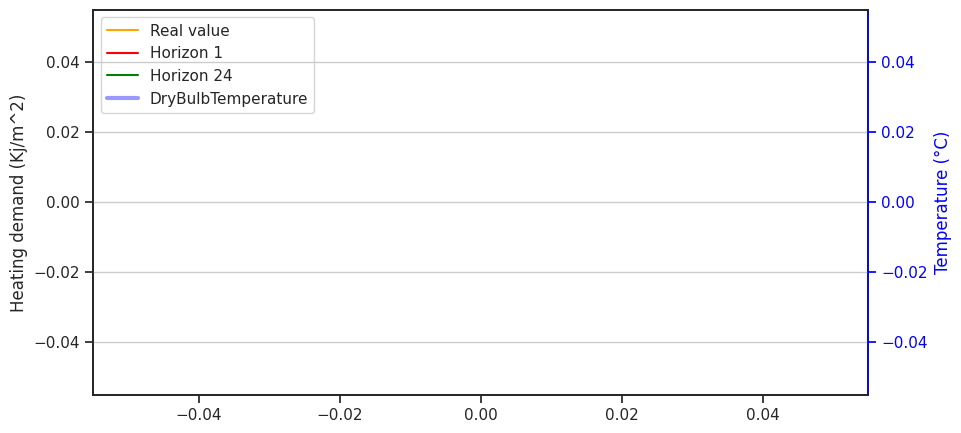

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe containing the columns

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the first three lines on ax1
ax1.plot(filtered_df.index, filtered_df['Heating'], color='orange', label='Real value')
ax1.plot(filtered_df.index, filtered_df['shifted_pt1'], color='red', label='Horizon 1')
ax1.plot(filtered_df.index, filtered_df['shifted_pt24'], color='green', label='Horizon 24')

# Create ax2 as a twin of ax1
ax2 = ax1.twinx()
ax2.plot(filtered_df.index, filtered_df['DryBulbTemperature'], color='blue', alpha=0.4, linewidth=3, label='DryBulbTemperature')


# Set labels and colors for ax2
ax2.set_ylabel('Temperature (°C)', color='blue')
ax2.spines['right'].set_color('blue')
ax2.tick_params(axis='y', colors='blue')

# Set label for ax1
ax1.set_ylabel('Heating demand (Kj/m^2)')

# Set common x-label
plt.xlabel('Hours')

# Combine the legends from both ax1 and ax2
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Show the grid
plt.grid(True)

# Display the plot
plt.show()


# putting some figures alongside each other

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create sample data for each section
data_section1 = pd.DataFrame({'x': range(10), 'y': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]})
data_section2 = pd.DataFrame({'x': range(10), 'y': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]})
data_section3 = pd.DataFrame({'x': range(10), 'y': [20, 18, 16, 14, 12, 10, 8, 6, 4, 2]})

# Set up the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 10), sharey=True)

# Plot data and set titles for each section
ax1.plot(data_section1['x'], data_section1['y'], linestyle='-', color='blue', linewidth=2)
ax1.set_title('Section 1')
ax1.set_ylabel('Y-axis')  # Set the y-axis label only for the first subplot
ax1.set_xlabel('X-axis')  # Set the x-axis label for the first subplot

ax2.plot(data_section2['x'], data_section2['y'], linestyle='--', color='red', linewidth=2)
ax2.set_title('Section 2')
ax2.set_xlabel('X-axis')  # Set the x-axis label for the second subplot

ax3.plot(data_section3['x'], data_section3['y'], linestyle=':', color='green', linewidth=2)
ax3.set_title('Section 3')
ax3.set_xlabel('X-axis')  # Set the x-axis label for the third subplot

# Set common x-axis label
fig.text(0.5, 0.04, 'X-axis', ha='center')

# Set background color and gridlines
fig.patch.set_facecolor('white')  # Set the background color to white
ax1.grid(True)  # Enable gridlines for the first subplot
ax2.grid(True)  # Enable gridlines for the second subplot
ax3.grid(True)  # Enable gridlines for the third subplot
# Show the plot
plt.show()